#                Telecom Churn Case Study

### Background

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### Business Objective:
1.Predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2.Identify important variables that are strong predictors of churn. Those variables may also indicate why customers choose to switch to other networks.

3.Recommend strategies to manage customer churn 

### Approaches:

1. Reading and Understanding the data
2. Data Cleaning (Missing value Treatment)
3. Filtering High value Customers 
4. Creating dependent variable (Churn variable)
5. Deriving New Variables
6. Exploratory Data Analysis
7. Outlier Treatment
8. Modeling

   * Create dummy from categorical variables
   * Test-Train split and Scaling of variables
   * Handling data imbalance
   * Build PCA and few Classification models
   * Build Classification model without using PCA & select best model
   * Identify main features which have most effect on Customer churn
   * Recommend strategies to manage customer churn


## Step 1: Reading & Understanding the data

In [42]:
#Import libraries and subpress warning

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn.impute import KNNImputer

# For iterative imputation to impute missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import warnings
warnings.filterwarnings('ignore') 


In [44]:
# To view all the columns, changing the set option
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 250)

In [45]:
# Read the data 

telecom_data = pd.read_csv("telecom_churn_data.csv")
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [46]:
telecom_data.shape

(99999, 226)

#### Note:
Raw Telecom Churn data has 99,999 records and 226 variables.

In [47]:
telecom_data.info(max_cols=300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

#### Note:

Among the 226 variables, 214 variables are numeric and remaining 12 variables are Character. All the Character variables are date variables.Those 12 Date variables are as followe:

last_date_of_month_6       
last_date_of_month_7       
last_date_of_month_8       
last_date_of_month_9 

date_of_last_rech_6         
date_of_last_rech_7         
date_of_last_rech_8         
date_of_last_rech_9   

date_of_last_rech_data_6    
date_of_last_rech_data_7    
date_of_last_rech_data_8    
date_of_last_rech_data_9 

There are only 8 categorical variables which contains value 1,0 and blank. Those variables are as follows:

fb_user_6                   
fb_user_7                   
fb_user_8                   
fb_user_9    

night_pck_user_6            
night_pck_user_7            
night_pck_user_8            
night_pck_user_9            


In [48]:
# Checking if there is any row where all the filds are missing(0 output means there is no such record in the data).
telecom_data.isnull().all(axis = 1).sum()

0

In [49]:
#Checking the uniqueness of the ID variable 

len(telecom_data['mobile_number'].unique().tolist())

99999

#### Note:
In the Telecom Churn data, all the mobile numbers are unique



In [50]:
# checking basic statistics

telecom_data.describe()


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

## Note:

There are 12 numeric variables whose values are unique. Those variables would not be helpful for our model. So we can drop those variables. Those 12 variables are as below:

    circle_id
    loc_og_t2o_mou
    std_og_t2o_mou
    loc_ic_t2o_mou

    std_og_t2c_mou_6
    std_og_t2c_mou_7
    std_og_t2c_mou_8
    std_og_t2c_mou_9

    std_ic_t2o_mou_6
    std_ic_t2o_mou_7
    std_ic_t2o_mou_8
    std_ic_t2o_mou_9


In [51]:
# Dropping variables whose values are unique

drop_list_1 = ['circle_id',
'loc_og_t2o_mou',
'std_og_t2o_mou',
'loc_ic_t2o_mou',

'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_og_t2c_mou_8',
'std_og_t2c_mou_9',

'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7',
'std_ic_t2o_mou_8',
'std_ic_t2o_mou_9']

telecom_data = telecom_data.drop(drop_list_1,axis = 1)

telecom_data.shape

(99999, 214)

In [52]:
# Analyse recharge pattern:

date_list = ['last_date_of_month_6',
'last_date_of_month_7',
'last_date_of_month_8',
'last_date_of_month_9',

'date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_9',

'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'date_of_last_rech_data_9']

Recharge_info = telecom_data[date_list]


In [53]:
Recharge_info['last_rech_6'] = np.where(Recharge_info['date_of_last_rech_6'].isnull(), 0, 1)
Recharge_info['last_rech_7'] = np.where(Recharge_info['date_of_last_rech_7'].isnull(), 0, 1)
Recharge_info['last_rech_8'] = np.where(Recharge_info['date_of_last_rech_8'].isnull(), 0, 1)
Recharge_info['last_rech_9'] = np.where(Recharge_info['date_of_last_rech_9'].isnull(), 0, 1)

Recharge_info['last_rech_data_6'] = np.where(Recharge_info['date_of_last_rech_data_6'].isnull(), 0, 1)
Recharge_info['last_rech_data_7'] = np.where(Recharge_info['date_of_last_rech_data_7'].isnull(), 0, 1)
Recharge_info['last_rech_data_8'] = np.where(Recharge_info['date_of_last_rech_data_8'].isnull(), 0, 1)
Recharge_info['last_rech_data_9'] = np.where(Recharge_info['date_of_last_rech_data_9'].isnull(), 0, 1)

Recharge_info.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   
2            9/30/2014           6/17/2014           7/24/2014   
3            9/30/2014           6/28/2014           7/31/2014   
4            9/30/2014           6/26/2014           7/28/2014   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0            8/8/2014           9/28/2014                6/21/2014   
1           8/28/2014           9/30/2014                      NaN   
2           8/14/2014           9/29/2014                      NaN   
3           8/31/2014           9/30/2014                      NaN   
4            8/9/2014           9/28/2014                 6/4/2014   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  \
0                7/16/2014                 8/8/2014                      NaN   
1                7/25/2014                8/10/2014                      NaN   
2                      NaN                      NaN                9/17/2014   
3                      NaN                      NaN                      NaN   
4                      NaN                      NaN                      NaN   

   last_rech_6  last_rech_7  last_rech_8  last_rech_9  last_rech_data_6  \
0            1            1            1            1                 1   
1            1            1            1            1                 0   
2            1            1            1            1                 0   
3            1            1            1            1                 0   
4            1            1            1            1                 1   

   last_rech_data_7  last_rech_data_8  last_rech_data_9  
0                 1                 1                 0  
1                 1                 1                 0  
2                 0                 0                 1  
3                 0                 0                 0  
4                 0                 0                 0

In [54]:
# Voice call recharge pattern

last_rech_6=Recharge_info['last_rech_6'].value_counts(normalize = True)*100
last_rech_7=Recharge_info['last_rech_7'].value_counts(normalize = True)*100
last_rech_8 = Recharge_info['last_rech_8'].value_counts(normalize = True)*100
last_rech_9 = Recharge_info['last_rech_9'].value_counts(normalize = True)*100

last_rech_summary = pd.DataFrame({"last_rech_6": last_rech_6,"last_rech_7": last_rech_7,"last_rech_8": last_rech_8,"last_rech_9": last_rech_9})
last_rech_summary

last_rech_6  last_rech_7  last_rech_8  last_rech_9
1    98.392984    98.232982    96.377964    95.239952
0     1.607016     1.767018     3.622036     4.760048

In [55]:
# Data recharge pattern

last_rech_data_6 = Recharge_info['last_rech_data_6'].value_counts(normalize = True)*100
last_rech_data_7 = Recharge_info['last_rech_data_7'].value_counts(normalize = True)*100
last_rech_data_8 = Recharge_info['last_rech_data_8'].value_counts(normalize = True)*100
last_rech_data_9 = Recharge_info['last_rech_data_9'].value_counts(normalize = True)*100

last_rech_summary = pd.DataFrame({"last_rech_data_6": last_rech_data_6, "last_rech_data_7": last_rech_data_7,"last_rech_data_8": last_rech_data_8,"last_rech_data_9": last_rech_data_9})
last_rech_summary

last_rech_data_6  last_rech_data_7  last_rech_data_8  last_rech_data_9
0         74.846748         74.428744         73.660737         74.077741
1         25.153252         25.571256         26.339263         25.922259

#### Note:

From the Above table we can see that voice call recharge % is dropping gradually from June to September. But For Data recharge, pattern is little different. From June to August, data recharge (1 indicates data recharge) has been increased around 1% but in september has decreased by 0.4%





## Step2: Data Cleaning (Missing value Treatment)





### Checking Missing values row wise:

In [56]:
# sum of misisng values in each row
missing_row_count = telecom_data.isnull().sum(axis=1)
missing_row_pct = round(100*telecom_data.isnull().sum(axis=1)/len(telecom_data.columns),2)
missing_row_summary = pd.DataFrame({"missing_count": missing_row_count, "missing_pct": missing_row_pct}).sort_values("missing_pct", ascending = False)
missing_row_summary

missing_count  missing_pct
3758             155        72.43
25489            155        72.43
5328             155        72.43
34935            155        72.43
24558            155        72.43
...              ...          ...
25428              0         0.00
13248              0         0.00
69041              0         0.00
69040              0         0.00
33352              0         0.00

[99999 rows x 2 columns]

In [57]:
# Removing records where more than 160 variables are missing

telecom_data = telecom_data[telecom_data.isnull().sum(axis=1) < 155]
telecom_data.shape

(99956, 214)

### Note:
43 records has been removed


### Checking Missing values column wise:

In [58]:
# Checking Missing values

missing_count = telecom_data.isnull().sum()
missing_pct = round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2)
missing_summary = pd.DataFrame({"missing_count": missing_count, "missing_pct": missing_pct}).sort_values("missing_pct",ascending = False )
missing_summary

missing_count  missing_pct
arpu_3g_6                         74803        74.84
av_rech_amt_data_6                74803        74.84
fb_user_6                         74803        74.84
night_pck_user_6                  74803        74.84
date_of_last_rech_data_6          74803        74.84
max_rech_data_6                   74803        74.84
count_rech_2g_6                   74803        74.84
count_rech_3g_6                   74803        74.84
total_rech_data_6                 74803        74.84
arpu_2g_6                         74803        74.84
arpu_3g_7                         74385        74.42
count_rech_2g_7                   74385        74.42
date_of_last_rech_data_7          74385        74.42
night_pck_user_7                  74385        74.42
total_rech_data_7                 74385        74.42
max_rech_data_7                   74385        74.42
arpu_2g_7                         74385        74.42
av_rech_amt_data_7                74385        74.42
fb_user_7                         74385        74.42
count_rech_3g_7                   74385        74.42
count_rech_2g_9                   74034        74.07
max_rech_data_9                   74034        74.07
total_rech_data_9                 74034        74.07
night_pck_user_9                  74034        74.07
fb_user_9                         74034        74.07
date_of_last_rech_data_9          74034        74.07
count_rech_3g_9                   74034        74.07
av_rech_amt_data_9                74034        74.07
arpu_3g_9                         74034        74.07
arpu_2g_9                         74034        74.07
arpu_3g_8                         73617        73.65
fb_user_8                         73617        73.65
night_pck_user_8                  73617        73.65
av_rech_amt_data_8                73617        73.65
date_of_last_rech_data_8          73617        73.65
total_rech_data_8                 73617        73.65
count_rech_3g_8                   73617        73.65
arpu_2g_8                         73617        73.65
count_rech_2g_8                   73617        73.65
max_rech_data_8                   73617        73.65
loc_ic_t2m_mou_9                   7702         7.71
isd_og_mou_9                       7702         7.71
spl_og_mou_9                       7702         7.71
og_others_9                        7702         7.71
loc_ic_t2t_mou_9                   7702         7.71
loc_ic_mou_9                       7702         7.71
std_og_t2f_mou_9                   7702         7.71
std_ic_t2t_mou_9                   7702         7.71
std_ic_t2m_mou_9                   7702         7.71
std_ic_t2f_mou_9                   7702         7.71
std_ic_mou_9                       7702         7.71
spl_ic_mou_9                       7702         7.71
isd_ic_mou_9                       7702         7.71
ic_others_9                        7702         7.71
std_og_mou_9                       7702         7.71
loc_ic_t2f_mou_9                   7702         7.71
loc_og_t2m_mou_9                   7702         7.71
roam_ic_mou_9                      7702         7.71
std_og_t2t_mou_9                   7702         7.71
loc_og_t2c_mou_9                   7702         7.71
std_og_t2m_mou_9                   7702         7.71
loc_og_t2t_mou_9                   7702         7.71
roam_og_mou_9                      7702         7.71
loc_og_t2f_mou_9                   7702         7.71
offnet_mou_9                       7702         7.71
onnet_mou_9                        7702         7.71
loc_og_mou_9                       7702         7.71
isd_ic_mou_8                       5335         5.34
loc_og_mou_8                       5335         5.34
std_ic_t2f_mou_8                   5335         5.34
std_ic_t2t_mou_8                   5335         5.34
spl_ic_mou_8                       5335         5.34
std_ic_t2m_mou_8                   5335         5.34
std_og_t2f_mou_8                   5335         5.34
ic_others_8                        5335         5.3

In [59]:
missing_summary["missing_grade"] = pd.cut(missing_summary.missing_pct, [0,.001,1,5,10,70,100], include_lowest = True)
missing_summary

missing_count  missing_pct    missing_grade
arpu_3g_6                         74803        74.84    (70.0, 100.0]
av_rech_amt_data_6                74803        74.84    (70.0, 100.0]
fb_user_6                         74803        74.84    (70.0, 100.0]
night_pck_user_6                  74803        74.84    (70.0, 100.0]
date_of_last_rech_data_6          74803        74.84    (70.0, 100.0]
max_rech_data_6                   74803        74.84    (70.0, 100.0]
count_rech_2g_6                   74803        74.84    (70.0, 100.0]
count_rech_3g_6                   74803        74.84    (70.0, 100.0]
total_rech_data_6                 74803        74.84    (70.0, 100.0]
arpu_2g_6                         74803        74.84    (70.0, 100.0]
arpu_3g_7                         74385        74.42    (70.0, 100.0]
count_rech_2g_7                   74385        74.42    (70.0, 100.0]
date_of_last_rech_data_7          74385        74.42    (70.0, 100.0]
night_pck_user_7                  74385        74.42    (70.0, 100.0]
total_rech_data_7                 74385        74.42    (70.0, 100.0]
max_rech_data_7                   74385        74.42    (70.0, 100.0]
arpu_2g_7                         74385        74.42    (70.0, 100.0]
av_rech_amt_data_7                74385        74.42    (70.0, 100.0]
fb_user_7                         74385        74.42    (70.0, 100.0]
count_rech_3g_7                   74385        74.42    (70.0, 100.0]
count_rech_2g_9                   74034        74.07    (70.0, 100.0]
max_rech_data_9                   74034        74.07    (70.0, 100.0]
total_rech_data_9                 74034        74.07    (70.0, 100.0]
night_pck_user_9                  74034        74.07    (70.0, 100.0]
fb_user_9                         74034        74.07    (70.0, 100.0]
date_of_last_rech_data_9          74034        74.07    (70.0, 100.0]
count_rech_3g_9                   74034        74.07    (70.0, 100.0]
av_rech_amt_data_9                74034        74.07    (70.0, 100.0]
arpu_3g_9                         74034        74.07    (70.0, 100.0]
arpu_2g_9                         74034        74.07    (70.0, 100.0]
arpu_3g_8                         73617        73.65    (70.0, 100.0]
fb_user_8                         73617        73.65    (70.0, 100.0]
night_pck_user_8                  73617        73.65    (70.0, 100.0]
av_rech_amt_data_8                73617        73.65    (70.0, 100.0]
date_of_last_rech_data_8          73617        73.65    (70.0, 100.0]
total_rech_data_8                 73617        73.65    (70.0, 100.0]
count_rech_3g_8                   73617        73.65    (70.0, 100.0]
arpu_2g_8                         73617        73.65    (70.0, 100.0]
count_rech_2g_8                   73617        73.65    (70.0, 100.0]
max_rech_data_8                   73617        73.65    (70.0, 100.0]
loc_ic_t2m_mou_9                   7702         7.71      (5.0, 10.0]
isd_og_mou_9                       7702         7.71      (5.0, 10.0]
spl_og_mou_9                       7702         7.71      (5.0, 10.0]
og_others_9                        7702         7.71      (5.0, 10.0]
loc_ic_t2t_mou_9                   7702         7.71      (5.0, 10.0]
loc_ic_mou_9                       7702         7.71      (5.0, 10.0]
std_og_t2f_mou_9                   7702         7.71      (5.0, 10.0]
std_ic_t2t_mou_9                   7702         7.71      (5.0, 10.0]
std_ic_t2m_mou_9                   7702         7.71      (5.0, 10.0]
std_ic_t2f_mou_9                   7702         7.71      (5.0, 10.0]
std_ic_mou_9                       7702         7.71      (5.0, 10.0]
spl_ic_mou_9                       7702         7.71      (5.0, 10.0]
isd_ic_mou_9                       7702         7.71      (5.0, 10.0]
ic_others_9                        7702         7.71      (5.0, 10.0]
std_og_mou_9                       7702         7.71      (5.0, 10.0]
loc_ic_t2f_mou_9                   7702         7.71      (5.0, 10.0]
loc_og_t2m_mou_9                   7

In [60]:
missing_summary["missing_grade"].value_counts()

(1.0, 5.0]         60
(-0.001, 0.001]    59
(5.0, 10.0]        54
(70.0, 100.0]      40
(0.001, 1.0]        1
(10.0, 70.0]        0
Name: missing_grade, dtype: int64

#### Note:
Among 226 variables, only 60 variables wouldn't have any missing values. There are 67 variables with missing value 1% to 5% and 58 variables with missing values within 5% to 10%. But for 40 variables missing value percentage is above 70%. So we have to observe those data closely to understand whether those missing values implies any meaning or they won't have any perticular meaning.

In [61]:
# Variablea which has more than 70% missing value
M_70 = missing_summary[missing_summary.missing_pct > 70.00]
M_70

missing_count  missing_pct  missing_grade
arpu_3g_6                         74803        74.84  (70.0, 100.0]
av_rech_amt_data_6                74803        74.84  (70.0, 100.0]
fb_user_6                         74803        74.84  (70.0, 100.0]
night_pck_user_6                  74803        74.84  (70.0, 100.0]
date_of_last_rech_data_6          74803        74.84  (70.0, 100.0]
max_rech_data_6                   74803        74.84  (70.0, 100.0]
count_rech_2g_6                   74803        74.84  (70.0, 100.0]
count_rech_3g_6                   74803        74.84  (70.0, 100.0]
total_rech_data_6                 74803        74.84  (70.0, 100.0]
arpu_2g_6                         74803        74.84  (70.0, 100.0]
arpu_3g_7                         74385        74.42  (70.0, 100.0]
count_rech_2g_7                   74385        74.42  (70.0, 100.0]
date_of_last_rech_data_7          74385        74.42  (70.0, 100.0]
night_pck_user_7                  74385        74.42  (70.0, 100.0]
total_rech_data_7                 74385        74.42  (70.0, 100.0]
max_rech_data_7                   74385        74.42  (70.0, 100.0]
arpu_2g_7                         74385        74.42  (70.0, 100.0]
av_rech_amt_data_7                74385        74.42  (70.0, 100.0]
fb_user_7                         74385        74.42  (70.0, 100.0]
count_rech_3g_7                   74385        74.42  (70.0, 100.0]
count_rech_2g_9                   74034        74.07  (70.0, 100.0]
max_rech_data_9                   74034        74.07  (70.0, 100.0]
total_rech_data_9                 74034        74.07  (70.0, 100.0]
night_pck_user_9                  74034        74.07  (70.0, 100.0]
fb_user_9                         74034        74.07  (70.0, 100.0]
date_of_last_rech_data_9          74034        74.07  (70.0, 100.0]
count_rech_3g_9                   74034        74.07  (70.0, 100.0]
av_rech_amt_data_9                74034        74.07  (70.0, 100.0]
arpu_3g_9                         74034        74.07  (70.0, 100.0]
arpu_2g_9                         74034        74.07  (70.0, 100.0]
arpu_3g_8                         73617        73.65  (70.0, 100.0]
fb_user_8                         73617        73.65  (70.0, 100.0]
night_pck_user_8                  73617        73.65  (70.0, 100.0]
av_rech_amt_data_8                73617        73.65  (70.0, 100.0]
date_of_last_rech_data_8          73617        73.65  (70.0, 100.0]
total_rech_data_8                 73617        73.65  (70.0, 100.0]
count_rech_3g_8                   73617        73.65  (70.0, 100.0]
arpu_2g_8                         73617        73.65  (70.0, 100.0]
count_rech_2g_8                   73617        73.65  (70.0, 100.0]
max_rech_data_8                   73617        73.65  (70.0, 100.0]

#### Note

After investigating the above 40 variables where missing is more than 70%, we have realized  the below points:

* 16 variables are related with network recharge. Missing value indicates people did not recharge the network
* 8 variables are related with 2G and 3G recharge and it is logical that all people would not use 2G or 3G network.
* 8 variables are related with revenue generated from 2G and 3G network and we can realize that missing indicates that there is no revenue generated from 2G or 3G as they are not using 2G or 3G network
* 8 variables are related with nigh pack users and FaceBook & other Social media connection. Here also missing value indicates people are not using those services

From the above points, we can understand that missing value for those above 40 variables are not actrual missing. Those missing basically represents that customers won't use those services.
So we will not drop those 40 variables due to high missing value, rather we will treat them.

### Missing value Treatment:

We can treat missing values in below ways:

* Drop columns if there is high missing value which wouldn't have any special meaning
* Drop rows if very less missing value present
* Impute missing values in velow ways:

        i) Mean, median or mode imputation 
       ii) Use KNN, Linear regression, fancyimputatin(in sklearn) etc.  for other statistical imputation
      iii) Logical imputation as per business when missing value contain special meaning
  
  For the above variables with high missing value but with special meaning we will do zeo imputation.

#### A) Missing value treatment where missing percentages is very high but have some underline meaning - Non Categorical Variables only

In [62]:
# List of variables for zero imputation

list_0 = ["arpu_2g_6",
"arpu_2g_7",
"arpu_2g_8",
"arpu_2g_9",
"arpu_3g_6",
"arpu_3g_7",
"arpu_3g_8",
"arpu_3g_9",
"av_rech_amt_data_6",
"av_rech_amt_data_7",
"av_rech_amt_data_8",
"av_rech_amt_data_9",
"count_rech_2g_6",
"count_rech_2g_7",
"count_rech_2g_8",
"count_rech_2g_9",
"count_rech_3g_6",
"count_rech_3g_7",
"count_rech_3g_8",
"count_rech_3g_9",
"max_rech_data_6",
"max_rech_data_7",
"max_rech_data_8",
"max_rech_data_9",
"total_rech_data_7",
"total_rech_data_8",
"total_rech_data_9"
]

In [63]:
telecom_data[list_0] = telecom_data[list_0].apply(lambda x: x.fillna(0))
round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2)

mobile_number                0.00
last_date_of_month_6         0.00
last_date_of_month_7         0.56
last_date_of_month_8         1.06
last_date_of_month_9         1.62
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.90
onnet_mou_7                  3.82
onnet_mou_8                  5.34
onnet_mou_9                  7.71
offnet_mou_6                 3.90
offnet_mou_7                 3.82
offnet_mou_8                 5.34
offnet_mou_9                 7.71
roam_ic_mou_6                3.90
roam_ic_mou_7                3.82
roam_ic_mou_8                5.34
roam_ic_mou_9                7.71
roam_og_mou_6                3.90
roam_og_mou_7                3.82
roam_og_mou_8                5.34
roam_og_mou_9                7.71
loc_og_t2t_mou_6             3.90
loc_og_t2t_mou_7             3.82
loc_og_t2t_mou_8             5.34
loc_og_t2t_mou_9             7.71
loc_og_t2m_mou

#### B) Missing value treatment where missing percentages is very high but have some underline meaning - Categorical Variables

There are 8 categorical variables whose values are 1,0 or Missing. Though missing values are more than 70%, but it contain an underline meaning that customers are not using those services. We will impute those missing by 999 to treat that as seperate category

In [64]:
# List of Categorical variables for 999 imputation

list_999 = ["fb_user_6",
"fb_user_7",
"fb_user_8",
"fb_user_9",
"night_pck_user_6",
"night_pck_user_7",
"night_pck_user_8",
"night_pck_user_9"
]

In [65]:
telecom_data[list_999] = telecom_data[list_999].apply(lambda x: x.fillna(999))
round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2)

mobile_number                0.00
last_date_of_month_6         0.00
last_date_of_month_7         0.56
last_date_of_month_8         1.06
last_date_of_month_9         1.62
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.90
onnet_mou_7                  3.82
onnet_mou_8                  5.34
onnet_mou_9                  7.71
offnet_mou_6                 3.90
offnet_mou_7                 3.82
offnet_mou_8                 5.34
offnet_mou_9                 7.71
roam_ic_mou_6                3.90
roam_ic_mou_7                3.82
roam_ic_mou_8                5.34
roam_ic_mou_9                7.71
roam_og_mou_6                3.90
roam_og_mou_7                3.82
roam_og_mou_8                5.34
roam_og_mou_9                7.71
loc_og_t2t_mou_6             3.90
loc_og_t2t_mou_7             3.82
loc_og_t2t_mou_8             5.34
loc_og_t2t_mou_9             7.71
loc_og_t2m_mou

#### C) Missing value imputation by Iterative Imputer of sklearn

There are 119 variables (without considering date variables) whose missing value is within 10%.

One of the most advanced methodology for performing missing data imputation is Iterative Imputation. For this we will use IterativeImputer package from sklearn.

IterativeImputer is a Multivariate imputer that estimates each feature from all the others. It works as a strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

Link:  
       https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

In [66]:
# Drop the date variable befor iterative imputation. We are not going to use date variables for model building purpose.

telecom_data = telecom_data.drop(date_list, axis = 1)

In [67]:
imp = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
                                 max_iter=10, tol=0.001, 
                                 n_nearest_features=4, initial_strategy='median',random_state=100)
imp.fit(telecom_data)
x = imp.transform(telecom_data)
telecom_data = pd.DataFrame(x,columns= telecom_data.columns,dtype='float64')

                             

In [68]:
telecom_data.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0   7.000843e+09  197.385  214.816  213.803   21.100   -19.853953   
1   7.001866e+09   34.047  355.074  268.321   86.285    24.110000   
2   7.001626e+09  167.690  189.058  210.226  290.714    11.540000   
3   7.001204e+09  221.338  251.102  508.054  389.500    99.910000   
4   7.000142e+09  261.636  309.876  238.174  163.426    50.310000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0      10.3163         0.00    21.328313     92.156432    109.061633   
1      78.6800         7.68    18.340000     15.740000     99.840000   
2      55.2400        37.26    74.810000    143.330000    220.590000   
3      54.3900       310.98   241.710000    123.310000    109.010000   
4     149.4400        83.89    58.780000     76.960000     91.880000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00     52.785628         3.4397      -2.358291           0.00   
1        304.76     53.760000         0.0000       0.000000           0.00   
2        208.36    118.910000         0.0000       0.000000           0.00   
3         71.68    113.540000         0.0000      54.860000          44.38   
4        124.26     45.810000         0.0000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0       1.949951       9.263538       9.615532           0.00       5.473499   
1       0.000000       0.000000       0.000000           0.00       0.000000   
2      38.490000       0.000000       0.000000           0.00      70.940000   
3       0.000000       0.000000      28.090000          39.04       0.000000   
4       0.000000       0.000000       0.000000           0.00       0.000000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0         20.872488         37.132101              0.00         15.898506   
1         23.880000         74.560000              7.68         18.340000   
2          7.190000         28.740000             13.58         14.390000   
3         73.680000         34.810000             10.61         15.490000   
4         50.310000        149.440000             83.89         58.780000   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0         89.005006         34.779551              0.00         30.510762   
1         11.510000         75.940000            291.86         53.760000   
2         29.340000         16.860000             38.46         28.160000   
3        107.430000         83.210000             22.46         65.460000   
4         67.640000         91.880000            124.26         37.890000   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0          3.709877          0.281652              0.00          3.958408   
1          0.000000          0.000000              0.00          0.000000   
2         24.110000         21.790000             15.61         22.240000   
3          1.910000          0.650000              4.91          2.060000   
4          0.000000          0.000000              0.00          1.930000   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0          0.310699          0.260356              0.00          0.984577   
1          0.000000          2.910000              0.00          0.000000   
2          0.000000        135.540000             45.76          0.480000   
3          0.000000          0.000000              0.00          0.000000   
4          0.000000          0.000000              0.00          0.000000   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0      66.99918    179.320786          0.00     50.265114        -39.101645   
1      35.39000    150.510000        299.54     72.110000          0.230000   
2      60.66000     67.410000         67.66     64.810000          4.340000   
3     183.03000    118.680000        

In [69]:
telecom_data.shape

(99956, 202)

In [70]:
round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2)

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7

#### Note:

All the missing values in the data has been treated in below 3 stages:

* Missing value treatment where missing percentages is very high but have some underline meaning - Non Categorical Variables only
* Missing value treatment where missing percentages is very high but have some underline meaning - Categorical Variables

* Missing value imputation by Iterative Imputer of sklearn


In [71]:
telecom_data.describe()

mobile_number        arpu_6        arpu_7        arpu_8        arpu_9  \
count   9.995600e+04  99956.000000  99956.000000  99956.000000  99956.000000   
mean    7.001207e+09    283.006663    278.656472    279.274821    261.757626   
std     6.956294e+05    328.470621    338.179656    344.500205    342.029117   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%     7.000606e+09     93.439750     87.087000     84.270000     62.838500   
50%     7.001205e+09    197.729000    191.775500    192.189000    176.938500   
75%     7.001812e+09    371.087500    365.443500    369.426500    353.550750   
max     7.002411e+09  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  99956.000000  99956.000000  99956.000000  99956.000000  99956.000000   
mean     126.808972    131.227019    127.993275    124.859730    195.664642   
std      292.696511    303.921327    302.044926    298.592339    312.212787   
min      -93.060076    -38.700056     -2.602219      0.000000      0.000000   
25%        5.560000      7.240000      6.310000      6.610000     36.690000   
50%       31.060000     34.260000     30.460000     31.080000     95.080000   
75%      112.790000    112.245000    109.565000    104.132500    227.640000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99956.000000  99956.000000  99956.000000   99956.000000   99956.000000   
mean     194.422171    190.494773    182.088812       9.859001       6.911912   
std      320.934267    319.546667    309.203016      71.609740      72.186685   
min        0.000000      0.000000      0.000000      -1.690390      -5.529568   
25%       33.930000     34.480000     31.210000       0.000000       0.000000   
50%       94.390000     87.830000     80.160000       0.000000       0.000000   
75%      220.882500    216.280000    206.390000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99956.000000   99956.000000   99956.000000   99956.000000   
mean        7.125839       6.231078      13.897367       9.577777   
std        66.779225      55.171771      70.092919      57.365849   
min        -8.313981      -5.620801       0.000000     -25.733246   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   99956.000000   99956.000000      99956.000000      99956.000000   
mean        9.592661       8.255109         46.235078         46.264011   
std        63.146235      56.451482        148.078575        152.760429   
min       -18.314362      -1.851717        -46.510417          0.000000   
25%         0.000000       0.000000          1.890000          1.860000   
50%         0.000000       0.000000         12.260000         12.860000   
75%         0.000000       0.000000         39.660000         39.260000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      99956.000000      99956.000000      99956.000000      99956.000000   
mean          45.035841         42.383328         92.018579         89.411186   
std          147.731938        142.896500        160.076137        155.264127   
min            0.000000       -201.342029          0.000000       -201.152891   
25%            1.940000          1.781067         10.760000         10.180000   
50%           12.195630         10.990000         42.090000 

## Step 3: Filtering High value Customers (HVC)

#### High Value Customers:
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers. Those customers are call High Value Customer.

For our project we will consider only HVC. As per the project guidelines definition of HVC is as below:

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

Here we will consider the recharge amount for voice call and data uses for the months June and July(6 and 7)

In [72]:
#  Total Data recharge amount calculation during the good phase ie. June and July

telecom_data['total_data_rech_6'] = telecom_data['total_rech_data_6'] * telecom_data['av_rech_amt_data_6']
telecom_data['total_data_rech_7'] = telecom_data['total_rech_data_7'] * telecom_data['av_rech_amt_data_7']


In [73]:
# Total recharge amount (Voice Call + Data) calculation during the good phase ie. June and July

telecom_data['total_voice_data_amt_6'] = telecom_data['total_rech_amt_6'] + telecom_data['total_data_rech_6']
telecom_data['total_voice_data_amt_7'] = telecom_data['total_rech_amt_7'] + telecom_data['total_data_rech_7']


In [74]:
# Calculate average recharge amount(voice call+data) during the good phase ie. June and July
telecom_data["avg_voice_data_amt_6_7"] = (telecom_data['total_voice_data_amt_6'] + telecom_data['total_voice_data_amt_7'])/2

In [75]:
# Calculate 70th percentile recharge amount(voice call+data) during the good phase ie. June and July
telecom_data.avg_voice_data_amt_6_7.quantile(0.7)

478.0

In [76]:
# High value customer selection

telecom_hvc = telecom_data[telecom_data.avg_voice_data_amt_6_7>= telecom_data.avg_voice_data_amt_6_7.quantile(0.7)].reset_index(drop=True)
telecom_hvc.head(10)

mobile_number    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
0   7.000843e+09   197.385   214.816   213.803    21.100   -19.853953   
1   7.000702e+09  1069.180  1349.850  3171.480   500.000    57.840000   
2   7.001525e+09   378.721   492.223   137.362   166.787   413.690000   
3   7.002124e+09   514.453   597.753   637.760   578.596   102.410000   
4   7.000887e+09    74.350   193.897   366.966   811.480    48.960000   
5   7.000150e+09   977.020  2362.833   409.230   799.356     0.000000   
6   7.000815e+09   363.987   486.558   393.909   391.709   248.990000   
7   7.000721e+09   482.832   425.764   229.769   143.596    86.390000   
8   7.000294e+09  1873.271   575.927   179.218  1189.744  2061.690000   
9   7.002189e+09   978.077  1141.296   706.020  1076.247   135.140000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0      10.3163         0.00    21.328313     92.156432    109.061633   
1      54.6800        52.29    65.161789    453.430000    567.160000   
2     351.0300        35.08    33.460000     94.660000     80.630000   
3     132.1100        85.14   161.630000    757.930000    896.680000   
4      50.6600        33.58    15.740000     85.410000     89.360000   
5       0.0000         0.00     0.000000      0.000000      0.000000   
6     619.9600       666.38   494.790000     88.860000     50.580000   
7     118.8800        80.44    40.060000    232.360000    280.780000   
8     881.4300       156.91  1589.230000   1087.760000    258.290000   
9     119.5900       102.69    99.830000    479.310000    543.180000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00     52.785628         3.4397      -2.358291           0.00   
1        325.91    241.240901        16.2300      33.490000          31.64   
2        136.48    108.710000         0.0000       0.000000           0.00   
3        983.39    869.890000         0.0000       0.000000           0.00   
4        205.89    111.880000         0.0000       0.000000           0.00   
5          0.00      0.000000         0.0000       0.000000           0.00   
6         97.81    213.240000         0.0000       0.000000           0.00   
7        136.69     49.060000         0.0000       0.000000           0.00   
8         68.18    728.410000         0.0000       0.000000           0.00   
9        261.34    403.230000         0.0000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0       1.949951       9.263538       9.615532           0.00       5.473499   
1      21.368612      23.740000      12.590000          38.06      75.042253   
2       0.000000       0.000000       0.000000           0.00       0.000000   
3       0.000000       0.000000       0.000000           0.00       0.000000   
4       0.000000       0.000000       0.000000           0.00       0.000000   
5       0.000000       0.000000       0.000000           0.00       0.000000   
6       0.000000       0.000000       0.000000           0.00       0.000000   
7       0.000000       0.000000       0.000000           0.00       0.000000   
8       0.000000       0.000000       0.000000           0.00       0.000000   
9       0.000000       0.000000       0.000000           0.00       0.000000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0         20.872488         37.132101              0.00         15.898506   
1         51.390000         31.380000             40.28          8.886067   
2        297.130000        217.590000             12.49         26.130000   
3          4.480000          6.160000             23.34         29.980000   
4         48.960000         50.660000             33.58         15.740000   
5          0.000000          0.000000              0.00          0.000000   
6         29.880000         17.330000              9.48         16.390000   
7         86.390000        118.880000             

In [77]:
telecom_hvc.shape

(30001, 207)

### Note:

As per the given criteria, if we seperate the High Value Customer, we are getting 30K customers. We would proceed with this set of HVC customers as per the project objective.

In [78]:
telecom_hvc.describe()

mobile_number        arpu_6        arpu_7        arpu_8        arpu_9  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    467.124246   
std     6.908784e+05    460.640461    479.776947    501.961981    501.568240   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%     7.000609e+09    309.865000    309.826000    231.473000    189.607000   
50%     7.001203e+09    481.694000    480.943000    427.585000    387.817000   
75%     7.001804e+09    699.943000    698.315000    661.491000    626.163000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     260.486275    268.826226    236.925585    217.763837    376.439930   
std      459.826489    479.810754    458.314740    436.678355    481.939837   
min      -92.562924      0.000000     -2.602219      0.000000      0.000000   
25%       17.090000     18.310000     13.890000     13.530000     77.878156   
50%       84.580000     83.190000     68.480000     61.240000    223.840000   
75%      290.440000    290.910000    244.530000    217.340000    489.660000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  30001.000000  30001.000000  30001.000000   30001.000000   30001.000000   
mean     380.980774    338.843935    311.081537      16.270051      12.669368   
std      498.301717    479.910478    445.242252      76.382825      75.853370   
min        0.000000      0.000000      0.000000       0.000000      -3.872893   
25%       76.310000     61.330000     50.730000       0.000000       0.000000   
50%      221.530000    183.680000    164.285229       0.000000       0.000000   
75%      495.090000    438.990000    402.040000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       12.771743      11.137185      26.816269      20.410414   
std        74.459149      67.350663     116.183862      96.093373   
min        -8.313981      -5.620801       0.000000     -25.733246   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3220.660000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       20.200392      16.456596         85.114118         86.649014   
std       104.890187      88.911221        228.637722        240.746693   
min       -18.314362      -1.851717        -46.510417          0.000000   
25%         0.000000       0.000000          5.230000          5.530000   
50%         0.000000       0.000000         25.910000         26.239693   
75%         0.000000       0.000000         78.280000         79.010000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          79.711345         74.415281        164.652593        163.842750   
std          227.772238        223.660628        249.536012        241.663038   
min            0.000000       -201.342029          0.000000        -73.606987   
25%            4.360000          3.690000         21.840000         22.760000   
50%           23.510000         19.640000         79.380000 

In [79]:
# Delete the variables created during HVC calculation

telecom_hvc = telecom_hvc.drop(['total_data_rech_6', 'total_data_rech_7', 'total_voice_data_amt_6', 'total_voice_data_amt_7'], axis = 1)
telecom_hvc.shape

(30001, 203)

## Step 4: Creating dependent variable (Churn variable)

### Definition of Churn:
Customers who have not made any calls (either incoming or outgoing) AND have not used mobile internet (2G or 3G) even once in the churn phase that is in September would be considered as churn and would be tagged as 1 otherwise customer would be tagged as 0

In [80]:
# Calculate total incoming and outgoing calls in churn phase (in September)
telecom_hvc['total_ic_og_mou_9'] = telecom_hvc['total_ic_mou_9'] + telecom_hvc['total_og_mou_9']

In [81]:
# Calculate total 2G and 3G network uses in churn phase (in September)
telecom_hvc['total_2G_3G_mb_9'] =  telecom_hvc['vol_2g_mb_9'] + telecom_hvc['vol_3g_mb_9']

In [82]:
# Deriving churn and non churn
telecom_hvc['total_usage_col'] = telecom_hvc['total_ic_og_mou_9'] + telecom_hvc['total_2G_3G_mb_9'] 

telecom_hvc['churn'] = np.where(telecom_hvc['total_usage_col']== 0, 1, 0)
telecom_hvc.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0   7.000843e+09   197.385   214.816   213.803   21.100   -19.853953   
1   7.000702e+09  1069.180  1349.850  3171.480  500.000    57.840000   
2   7.001525e+09   378.721   492.223   137.362  166.787   413.690000   
3   7.002124e+09   514.453   597.753   637.760  578.596   102.410000   
4   7.000887e+09    74.350   193.897   366.966  811.480    48.960000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0      10.3163         0.00    21.328313     92.156432    109.061633   
1      54.6800        52.29    65.161789    453.430000    567.160000   
2     351.0300        35.08    33.460000     94.660000     80.630000   
3     132.1100        85.14   161.630000    757.930000    896.680000   
4      50.6600        33.58    15.740000     85.410000     89.360000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00     52.785628         3.4397      -2.358291           0.00   
1        325.91    241.240901        16.2300      33.490000          31.64   
2        136.48    108.710000         0.0000       0.000000           0.00   
3        983.39    869.890000         0.0000       0.000000           0.00   
4        205.89    111.880000         0.0000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0       1.949951       9.263538       9.615532           0.00       5.473499   
1      21.368612      23.740000      12.590000          38.06      75.042253   
2       0.000000       0.000000       0.000000           0.00       0.000000   
3       0.000000       0.000000       0.000000           0.00       0.000000   
4       0.000000       0.000000       0.000000           0.00       0.000000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0         20.872488         37.132101              0.00         15.898506   
1         51.390000         31.380000             40.28          8.886067   
2        297.130000        217.590000             12.49         26.130000   
3          4.480000          6.160000             23.34         29.980000   
4         48.960000         50.660000             33.58         15.740000   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0         89.005006         34.779551              0.00         30.510762   
1        308.630000        447.380000            162.28         83.820161   
2         80.960000         70.580000             50.54         34.580000   
3         91.810000         87.930000            104.81        107.540000   
4         82.940000         83.010000            148.56         83.730000   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0          3.709877          0.281652              0.00          3.958408   
1         62.130000         55.140000             53.23          5.531495   
2          0.000000          0.000000              0.00          0.000000   
3          0.750000          0.000000              1.58          0.000000   
4          0.000000          0.000000              0.00          2.450000   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0          0.310699          0.260356              0.00          0.984577   
1          0.000000          0.000000              0.00          0.848949   
2          0.000000          0.000000              7.15          0.000000   
3          0.000000          0.000000              0.00          0.000000   
4          0.000000          0.000000             17.71          4.080000   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0      66.99918    179.320786          0.00     50.265114        -39.101645   
1     422.16000    533.910000        255.79    453.113609          4.300000   
2     378.09000    288.180000         63.04     60.710000        116.560000   
3      97.04000    

In [83]:
churn_counts = telecom_hvc['churn'].value_counts()
churn_pct = round(telecom_hvc['churn'].value_counts(normalize = True)*100,1)
churn_summary = pd.DataFrame({"churn_counts": churn_counts, "churn_pct": churn_pct}).reset_index()
churn_summary

index  churn_counts  churn_pct
0      0         27560       91.9
1      1          2441        8.1

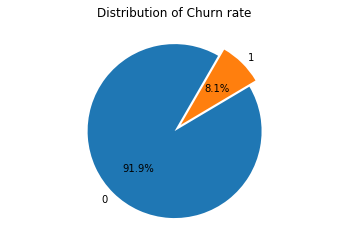

In [84]:
plt.axis('equal')
plt.pie(churn_summary['churn_counts'], 
        labels = churn_summary["index"], 
        radius = 1,
        shadow=False, 
        startangle=60,
        explode=[0,0.1],
        autopct='%1.1f%%')
plt.title('Distribution of Churn rate')
plt.show()

#### Note:

As per the project guideline, we have derived customer churn (1) and not-churn(0).
* Churn percentage is 8.1%

####  Dropping variables related with churn phase i.e. related with September
As the objective is to predict churn of HVC before churn phase, we should not use any information as independent variable from churn phase. We have to drop all information of the 9th month i.e month of September/churn phase

In [88]:
# List of 52 variables during churn phase (Date variables are already deleted)

list_month9 = ["arpu_2g_9",
"arpu_3g_9",
"arpu_9",
"av_rech_amt_data_9",
"count_rech_2g_9",
"count_rech_3g_9",
"fb_user_9",
"ic_others_9",
"isd_ic_mou_9",
"isd_og_mou_9",
"last_day_rch_amt_9",
"loc_ic_mou_9",
"loc_ic_t2f_mou_9",
"loc_ic_t2m_mou_9",
"loc_ic_t2t_mou_9",
"loc_og_mou_9",
"loc_og_t2c_mou_9",
"loc_og_t2f_mou_9",
"loc_og_t2m_mou_9",
"loc_og_t2t_mou_9",
"max_rech_amt_9",
"max_rech_data_9",
"monthly_2g_9",
"monthly_3g_9",
"night_pck_user_9",
"offnet_mou_9",
"og_others_9",
"onnet_mou_9",
"roam_ic_mou_9",
"roam_og_mou_9",
"sachet_2g_9",
"sachet_3g_9",
"spl_ic_mou_9",
"spl_og_mou_9",
"std_ic_mou_9",
"std_ic_t2f_mou_9",
"std_ic_t2m_mou_9",
"std_ic_t2t_mou_9",
"std_og_mou_9",
"std_og_t2f_mou_9",
"std_og_t2m_mou_9",
"std_og_t2t_mou_9",
"total_ic_mou_9",
"total_og_mou_9",
"total_rech_amt_9",
"total_rech_data_9",
"total_rech_num_9",
"vol_2g_mb_9",
"vol_3g_mb_9",
"total_ic_og_mou_9",
"total_2G_3G_mb_9",
"total_usage_col"
]

In [89]:
telecom_churn = telecom_hvc.drop(list_month9, axis = 1)
telecom_churn.shape

(30001, 155)

In [90]:
telecom_churn.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7.000843e+09   197.385   214.816   213.803   -19.853953      10.3163   
1   7.000702e+09  1069.180  1349.850  3171.480    57.840000      54.6800   
2   7.001525e+09   378.721   492.223   137.362   413.690000     351.0300   
3   7.002124e+09   514.453   597.753   637.760   102.410000     132.1100   
4   7.000887e+09    74.350   193.897   366.966    48.960000      50.6600   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00     92.156432    109.061633          0.00         3.4397   
1        52.29    453.430000    567.160000        325.91        16.2300   
2        35.08     94.660000     80.630000        136.48         0.0000   
3        85.14    757.930000    896.680000        983.39         0.0000   
4        33.58     85.410000     89.360000        205.89         0.0000   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -2.358291           0.00       9.263538       9.615532           0.00   
1      33.490000          31.64      23.740000      12.590000          38.06   
2       0.000000           0.00       0.000000       0.000000           0.00   
3       0.000000           0.00       0.000000       0.000000           0.00   
4       0.000000           0.00       0.000000       0.000000           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         20.872488         37.132101              0.00         89.005006   
1         51.390000         31.380000             40.28        308.630000   
2        297.130000        217.590000             12.49         80.960000   
3          4.480000          6.160000             23.34         91.810000   
4         48.960000         50.660000             33.58         82.940000   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         34.779551              0.00          3.709877          0.281652   
1        447.380000            162.28         62.130000         55.140000   
2         70.580000             50.54          0.000000          0.000000   
3         87.930000            104.81          0.750000          0.000000   
4         83.010000            148.56          0.000000          0.000000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00          0.310699          0.260356              0.00   
1             53.23          0.000000          0.000000              0.00   
2              0.00          0.000000          0.000000              7.15   
3              1.58          0.000000          0.000000              0.00   
4              0.00          0.000000          0.000000             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0      66.99918    179.320786          0.00        -39.101645   
1     422.16000    533.910000        255.79          4.300000   
2     378.09000    288.180000         63.04        116.560000   
3      97.04000     94.090000        129.74         97.930000   
4     131.91000    133.680000        182.14          0.000000   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0          5.062388              0.00         21.579475          7.108721   
1         23.290000             12.01         49.890000         31.760000   
2        133.430000             22.58         13.690000         10.040000   
3        125.940000             61.79        665.360000        808.740000   
4          0.000000              0.00          2.360000          6.350000   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00          0.681735          0.428885              0.00   
1             49.14          6.660000         20.080000             16.68   
2             75.69          0.000000          0.000000              0.00   
3            876.99          0.000000          0.000000        

## Step 5: Deriving New Variables

We will try to extract few features from the given features which may track the trend of customers more clearly.
June and July (month 6 and 7) are known as Good phase and August (month 8) is action phase when customer start to feel some issue. So we will try to change the behaviour of the customers from different aspects in between of those two phase.

In [95]:
# change in pattern of different type incoming calls

telecom_churn['Change_loc_ic_mou'] = ((telecom_churn['loc_ic_mou_6'] + telecom_churn['loc_ic_mou_7'])/2) - telecom_churn['loc_ic_mou_8']

telecom_churn['Change_std_ic_mou'] = ((telecom_churn['std_ic_mou_6'] + telecom_churn['std_ic_mou_7'])/2) - telecom_churn['std_ic_mou_8']

telecom_churn['Change_isd_ic_mou'] = ((telecom_churn['isd_ic_mou_6'] + telecom_churn['isd_ic_mou_7'])/2) - telecom_churn['isd_ic_mou_8']

telecom_churn['Change_spl_ic_mou'] = ((telecom_churn['spl_ic_mou_6'] + telecom_churn['spl_ic_mou_7'])/2) - telecom_churn['spl_ic_mou_8'] 

telecom_churn['Change_roam_ic_mou'] = ((telecom_churn['roam_ic_mou_6'] + telecom_churn['roam_ic_mou_7'])/2) - telecom_churn['roam_ic_mou_8'] 

telecom_churn['Change_total_ic_mou'] = ((telecom_churn['total_ic_mou_6'] + telecom_churn['total_ic_mou_7'])/2) -telecom_churn['total_ic_mou_8'] 


In [96]:
# change in pattern of differen tpe ty outgoing calls

telecom_churn['Change_loc_og_mou'] = ((telecom_churn['loc_og_mou_6'] + telecom_churn['loc_og_mou_7'])/2) - telecom_churn['loc_og_mou_8'] 

telecom_churn['Change_std_og_mou'] = ((telecom_churn['std_og_mou_6'] + telecom_churn['std_og_mou_7'])/2) - telecom_churn['std_og_mou_8']

telecom_churn['Change_isd_og_mou'] = ((telecom_churn['isd_og_mou_6'] + telecom_churn['isd_og_mou_7'])/2) - telecom_churn['isd_og_mou_8'] 

telecom_churn['Change_spl_og_mou'] = ((telecom_churn['spl_og_mou_6'] + telecom_churn['spl_og_mou_7'])/2) - telecom_churn['spl_og_mou_8'] 

telecom_churn['Change_roam_og_mou'] =  ((telecom_churn['roam_og_mou_6'] + telecom_churn['roam_og_mou_7'])/2) - telecom_churn['roam_og_mou_8'] 

telecom_churn['Change_total_og_mou'] = ((telecom_churn['total_og_mou_6'] + telecom_churn['total_og_mou_7'])/2) - telecom_churn['total_og_mou_8']


In [97]:
# Change in voice call recharge pattern

telecom_churn['Change_total_rech_num'] = ((telecom_churn['total_rech_num_6'] + telecom_churn['total_rech_num_7'])/2) - telecom_churn['total_rech_num_8'] 

telecom_churn['Change_total_rech_amt'] = ((telecom_churn['total_rech_amt_6'] + telecom_churn['total_rech_amt_7'])/2) -  telecom_churn['total_rech_amt_8']

telecom_churn['Change_max_rech_amt'] = ((telecom_churn['max_rech_amt_6'] + telecom_churn['max_rech_amt_7'])/2) - telecom_churn['max_rech_amt_8']


In [98]:
# Change in data uses by the customers

telecom_churn['Change_total_rech_data'] =  ((telecom_churn['total_rech_data_6'] + telecom_churn['total_rech_data_7'])/2) -telecom_churn['total_rech_data_8'] 

telecom_churn['Change_max_rech_data'] = ((telecom_churn['max_rech_data_6'] + telecom_churn['max_rech_data_7'])/2) - telecom_churn['max_rech_data_8'] 

telecom_churn['Change_av_rech_amt_data'] = ((telecom_churn['av_rech_amt_data_6'] + telecom_churn['av_rech_amt_data_7'])/2) - telecom_churn['av_rech_amt_data_8']

telecom_churn['Change_vol_2g_mb'] = ((telecom_churn['vol_2g_mb_6'] + telecom_churn['vol_2g_mb_7'])/2) - telecom_churn['vol_2g_mb_8']

telecom_churn['Change_vol_3g_mb'] =  ((telecom_churn['vol_3g_mb_6'] + telecom_churn['vol_3g_mb_7'])/2) - telecom_churn['vol_3g_mb_8']


In [99]:
# Change of total recharge(Data + voice)

telecom_churn['Change_total_voice_data_recharge_amt'] = telecom_churn["avg_voice_data_amt_6_7"] - (telecom_churn['total_rech_data_8'] * telecom_churn['av_rech_amt_data_8'])

# Change of pattern in same company network

telecom_churn['Change_onnet_mou'] = ((telecom_churn['onnet_mou_6'] + telecom_churn['onnet_mou_7'])/2) - telecom_churn['onnet_mou_8'] 

# Change of pattern in different company network

telecom_churn['Change_offnet_mou'] = ((telecom_churn['offnet_mou_6'] + telecom_churn['offnet_mou_7'])/2) - telecom_churn['offnet_mou_8'] 


In [100]:
telecom_churn.shape

(30001, 178)

In [101]:
derived_var_list = ['Change_offnet_mou',
'Change_onnet_mou',
'Change_total_voice_data_recharge_amt', 
'Change_loc_ic_mou',
'Change_std_ic_mou',
'Change_isd_ic_mou',
'Change_spl_ic_mou', 
'Change_roam_ic_mou',
'Change_total_ic_mou',
'Change_loc_og_mou', 
'Change_std_og_mou',
'Change_isd_og_mou',
'Change_spl_og_mou',
'Change_roam_og_mou',
'Change_total_og_mou',                 
'Change_total_rech_num',
'Change_total_rech_amt',
'Change_max_rech_amt',
'Change_total_rech_data',
'Change_max_rech_data', 
'Change_av_rech_amt_data',
'Change_vol_2g_mb',
'Change_vol_3g_mb']

telecom_churn[derived_var_list].describe()

Change_offnet_mou  Change_onnet_mou  \
count       30001.000000      30001.000000   
mean           39.866417         27.730666   
std           348.292530        303.586845   
min        -12604.240000      -6359.920000   
25%           -44.865000        -20.020000   
50%            11.510000          3.280000   
75%           100.095000         51.505000   
max          7094.390000       5295.315000   

       Change_total_voice_data_recharge_amt  Change_loc_ic_mou  \
count                          30001.000000       30001.000000   
mean                             689.367685           6.613843   
std                             1515.850367         175.588596   
min                           -85318.000000       -3485.370000   
25%                              487.000000         -37.075000   
50%                              642.500000           4.000000   
75%                              949.500000          47.920000   
max                            57164.000000        2655.205238   

       Change_std_ic_mou  Change_isd_ic_mou  Change_spl_ic_mou  \
count       30001.000000       30001.000000       30001.000000   
mean            3.023636           0.149447           0.013408   
std            98.068937          56.668037           0.174485   
min         -3321.395000       -3163.690000          -4.450000   
25%            -6.740000           0.000000           0.000000   
50%             0.590000           0.000000           0.000000   
75%            11.510000           0.000000           0.000000   
max          2777.350000        5534.595000          16.280000   

       Change_roam_ic_mou  Change_total_ic_mou  Change_loc_og_mou  \
count        30001.000000         30001.000000       30001.000000   
mean             1.697967            13.430810          16.939345   
std             65.184460           221.899902         210.048033   
min          -2330.200000         -3485.370000       -4619.975000   
25%              0.000000           -44.280000         -30.880000   
50%              0.000000             5.610000           4.665000   
75%              0.000000            67.230000          58.280000   
max           1296.985000          5710.150000        3867.830000   

       Change_std_og_mou  Change_isd_og_mou  Change_spl_og_mou  \
count       30001.000000       30001.000000       30001.000000   
mean           44.893901           0.047351          -0.259762   
std           417.448719          12.103646          18.038043   
min        -12715.480000        -544.780000        -747.620000   
25%            -9.887600           0.000000          -1.870000   
50%             0.645000           0.000000           0.000000   
75%            55.850000           0.000000           2.655000   
max          7127.425000         362.360000        1081.910000   

       Change_roam_og_mou  Change_total_og_mou  Change_total_rech_num  \
count        30001.000000         30001.000000           30001.000000   
mean             3.412949            67.437337               1.812056   
std             93.652120           502.630069               6.755899   
min          -3057.150000        -12768.705000            -130.500000   
25%              0.000000           -67.915000              -1.000000   
50%              0.000000            14.625000               1.500000   
75%              0.475000           168.025000               4.000000   
max           2410.835000          7213.410000             147.500000   

       Change_total_rech_amt  Change_max_rech_amt  Change_total_rech_data  \
count           30001.000000         30001.000000            30001.000000   
mean               76.249725            10.598813                0.330226   
std               418.479122           136.893018                2.171143   
min            -14344.500000         -3949.000000              -52.500000   
25%               -99.500000           -25.000000                0.000000   
50%                57.500000             0.000000                

## Step 6: Exploratory Data Analysis

### i) Correlation check

In [102]:
telecom_churn.info(max_cols=300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 178 columns):
mobile_number                           30001 non-null float64
arpu_6                                  30001 non-null float64
arpu_7                                  30001 non-null float64
arpu_8                                  30001 non-null float64
onnet_mou_6                             30001 non-null float64
onnet_mou_7                             30001 non-null float64
onnet_mou_8                             30001 non-null float64
offnet_mou_6                            30001 non-null float64
offnet_mou_7                            30001 non-null float64
offnet_mou_8                            30001 non-null float64
roam_ic_mou_6                           30001 non-null float64
roam_ic_mou_7                           30001 non-null float64
roam_ic_mou_8                           30001 non-null float64
roam_og_mou_6                           30001 non-null float64
roam_og_

In [103]:
var_list = ["arpu_6",
"onnet_mou_6",
"offnet_mou_6",
"roam_ic_mou_6",
"roam_og_mou_6",
"loc_og_t2t_mou_6",
"loc_og_t2m_mou_6",
"loc_og_t2f_mou_6",
"loc_og_t2c_mou_6",
"loc_og_mou_6",
"std_og_t2t_mou_6",
"std_og_t2m_mou_6",
"std_og_t2f_mou_6",
"std_og_mou_6",
"isd_og_mou_6",
"spl_og_mou_6",
"og_others_6",
"total_og_mou_6",
"loc_ic_t2t_mou_6",
"loc_ic_t2m_mou_6",
"loc_ic_t2f_mou_6",
"loc_ic_mou_6",
"std_ic_t2t_mou_6",
"std_ic_t2m_mou_6",
"std_ic_t2f_mou_6",
"std_ic_mou_6",
"total_ic_mou_6",
"spl_ic_mou_6",
"isd_ic_mou_6",
"ic_others_6",
"total_rech_num_6",
"total_rech_amt_6",
"max_rech_amt_6",
"last_day_rch_amt_6",
"total_rech_data_6",
"max_rech_data_6",
"count_rech_2g_6",
"count_rech_3g_6",
"av_rech_amt_data_6",
"vol_2g_mb_6",
"vol_3g_mb_6",
"arpu_3g_6",
"arpu_2g_6",
"night_pck_user_6",
"monthly_2g_6",
"sachet_2g_6",
"monthly_3g_6",
"sachet_3g_6",
"fb_user_6",
"aon",
"jun_vbc_3g",
"Change_loc_ic_mou",
"Change_std_ic_mou",
"Change_isd_ic_mou",
"Change_spl_ic_mou",
"Change_roam_ic_mou",
"Change_total_ic_mou",
"Change_loc_og_mou",
"Change_std_og_mou",
"Change_isd_og_mou",
"Change_spl_og_mou",
"Change_roam_og_mou",
"Change_total_og_mou",
"Change_total_rech_num",
"Change_total_rech_amt",
"Change_max_rech_amt",
"Change_total_rech_data",
"Change_max_rech_data",
"Change_av_rech_amt_data",
"Change_vol_2g_mb",
"Change_vol_3g_mb",
"Change_total_voice_data_recharge_amt",
"Change_onnet_mou",
"Change_offnet_mou"
]

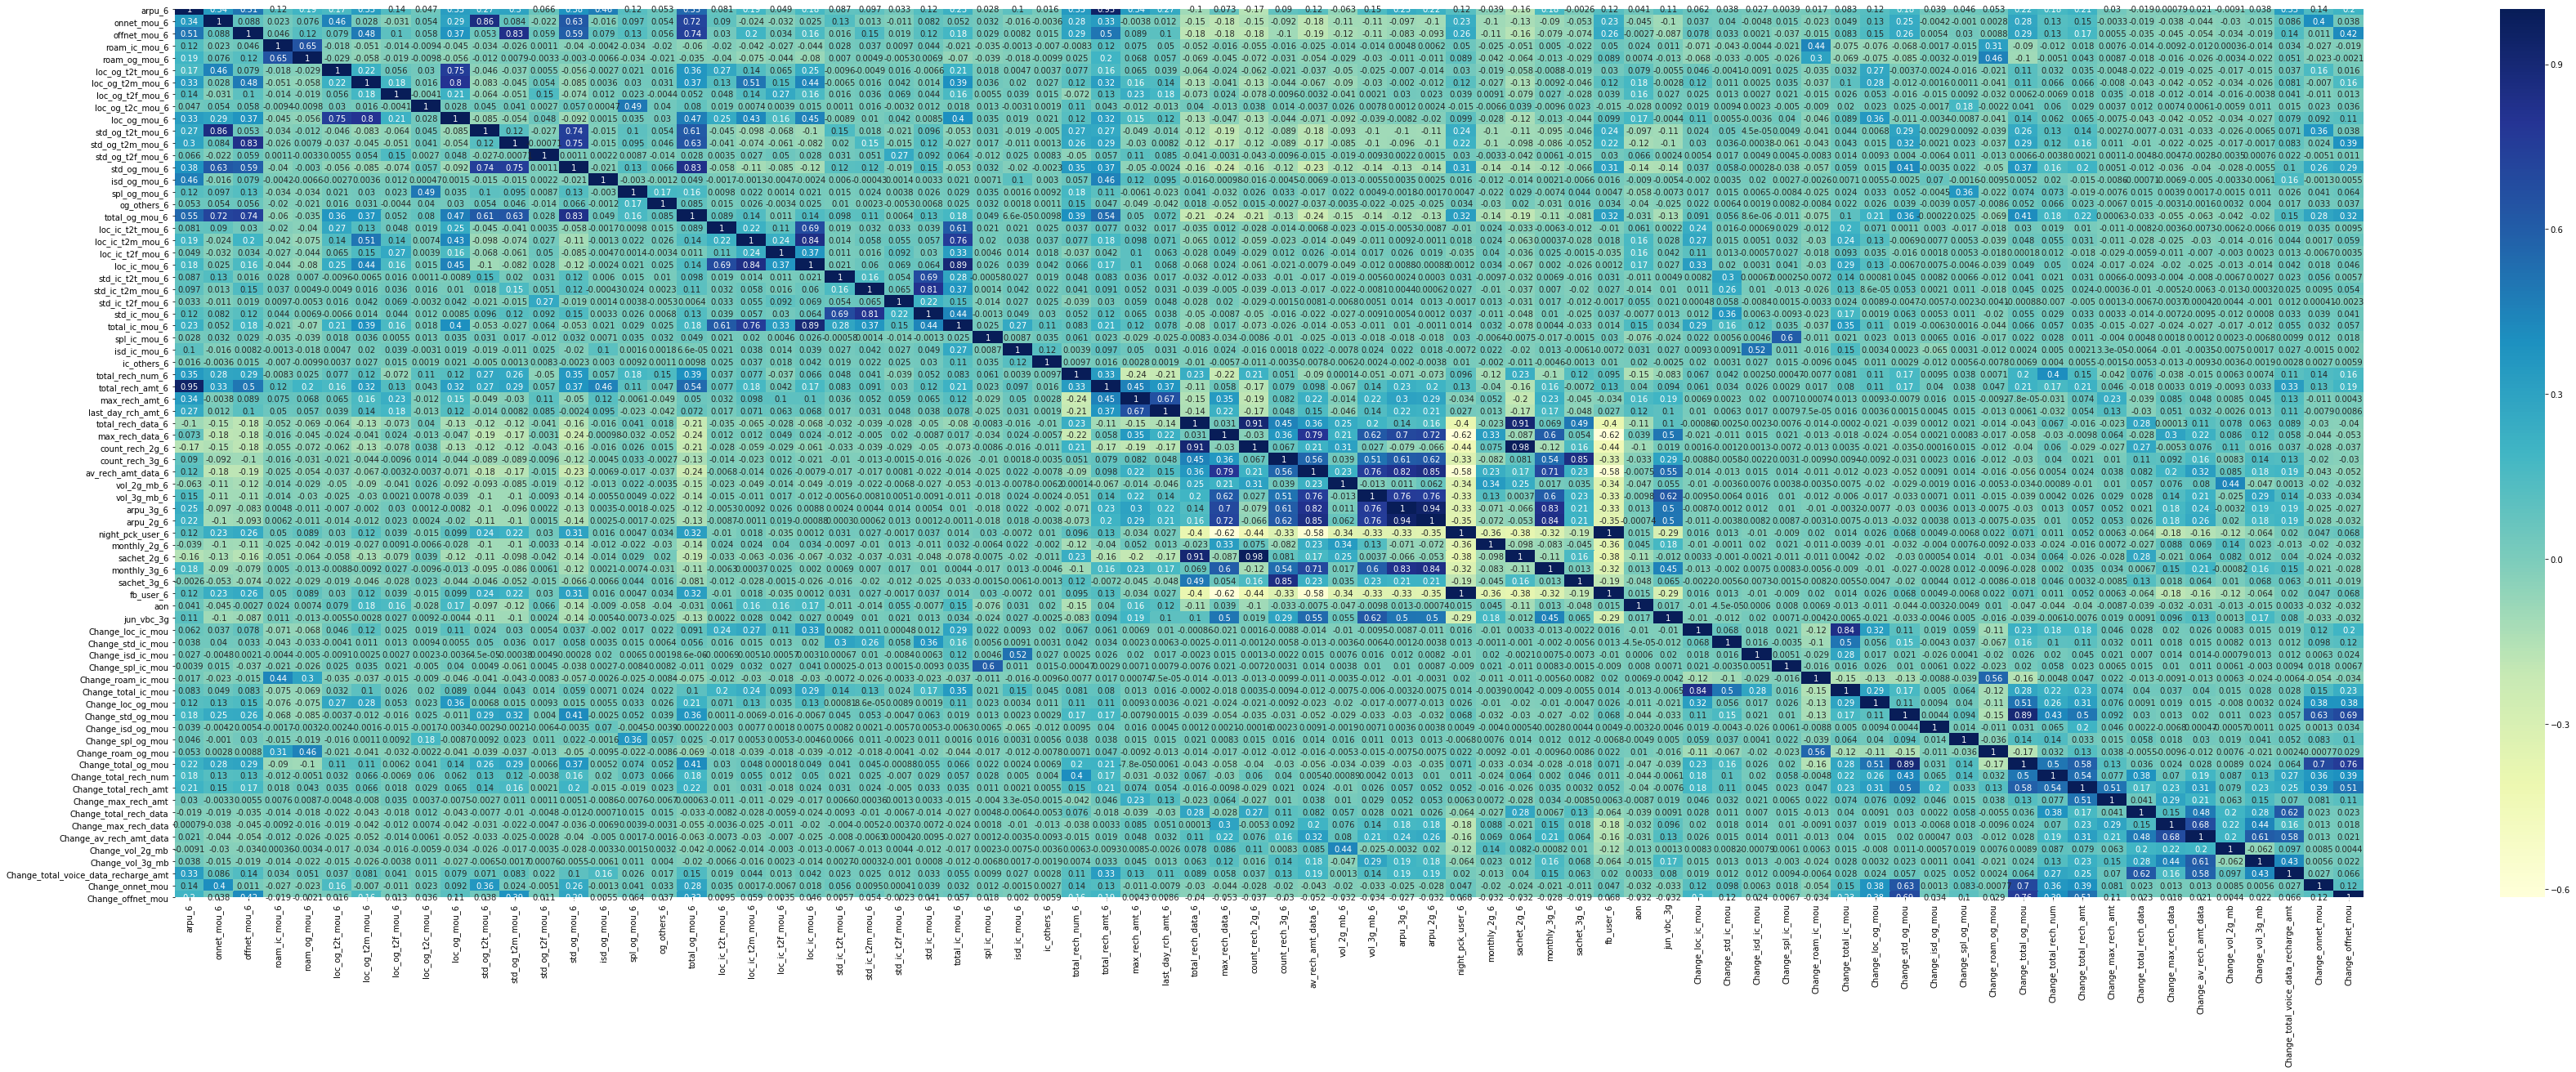

In [104]:
# Let's check the correlation coefficients again

plt.figure(figsize = (60, 20))

sns.heatmap(telecom_churn[var_list].corr() , annot = True, cmap="YlGnBu")
plt.show()

#### Note:

From the above table we can observe there are few variables which are highly correlated. Few examples:

* change of total recharge data is 100% correlated with fb_user
* tot_rech_amt and arpu are highly correlated. So we can drop arpu feature
* onnet_mou is highly correlated with std_og_t2t_mou
* offnet_mou with std_og_t2m_mou

So we can use PCA as the features are correlated

### ii)  Visualisation of data

Now we will visualize the variables to understand the relationship of different variables with dependent variables

In [105]:
var_list_1 = ["churn",              
"Change_loc_ic_mou",
"Change_std_ic_mou",
"Change_isd_ic_mou",
"Change_spl_ic_mou",
"Change_roam_ic_mou"]

var_list_2 = ["churn", 
"Change_total_ic_mou",
"Change_loc_og_mou",
"Change_std_og_mou",
"Change_isd_og_mou",
"Change_spl_og_mou",
"Change_roam_og_mou"]

var_list_3 = ["churn", 
"Change_total_og_mou",
"Change_total_rech_num",
"Change_total_rech_amt",
"Change_max_rech_amt",
"Change_total_rech_data",
"Change_max_rech_data"]

var_list_4 = ["churn", 
"Change_av_rech_amt_data",
"Change_vol_2g_mb",
"Change_vol_3g_mb",
"Change_total_voice_data_recharge_amt",
"Change_onnet_mou",
"Change_offnet_mou"]             


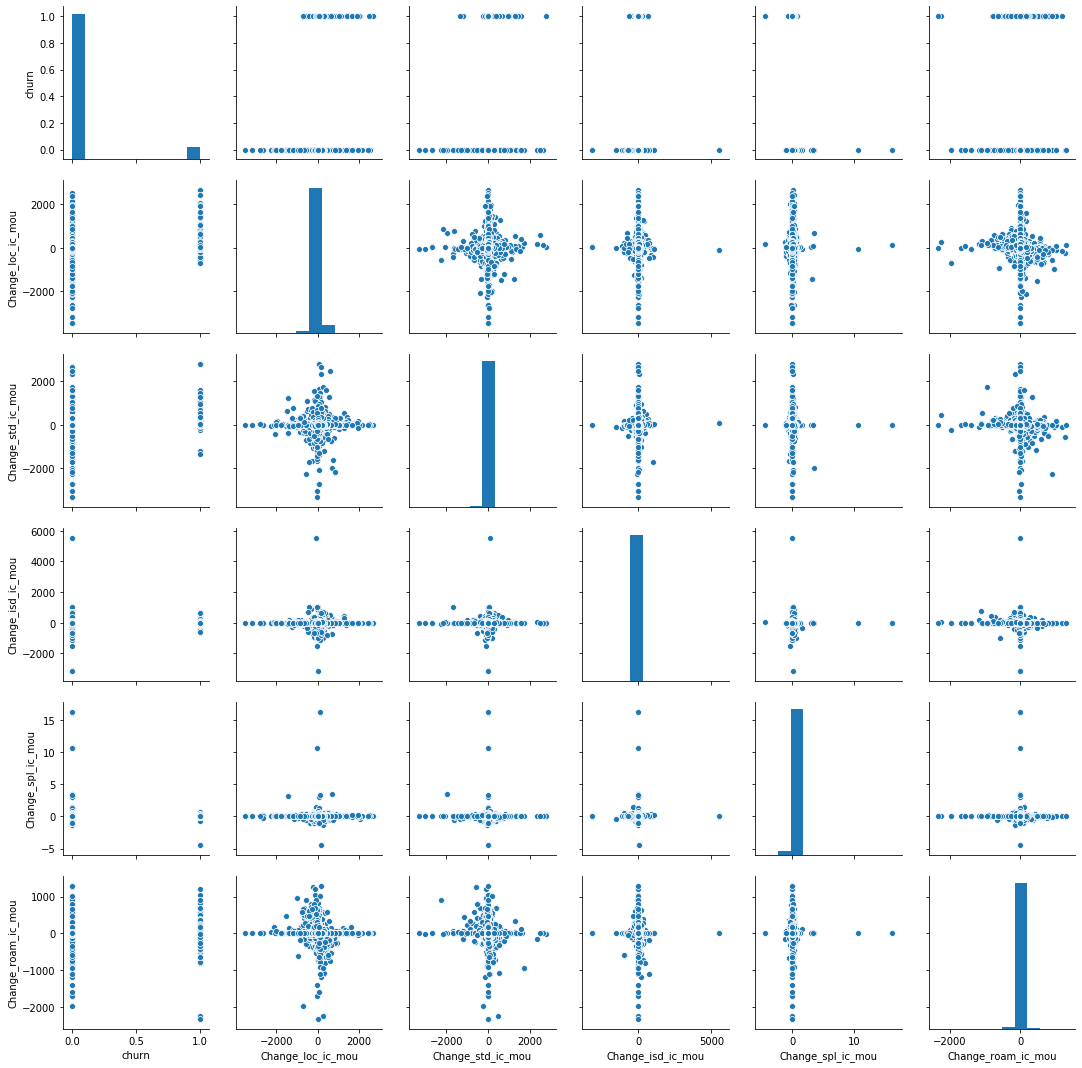

In [106]:
Churn_relation = telecom_churn[var_list_1]
sns.pairplot(Churn_relation)
plt.show()

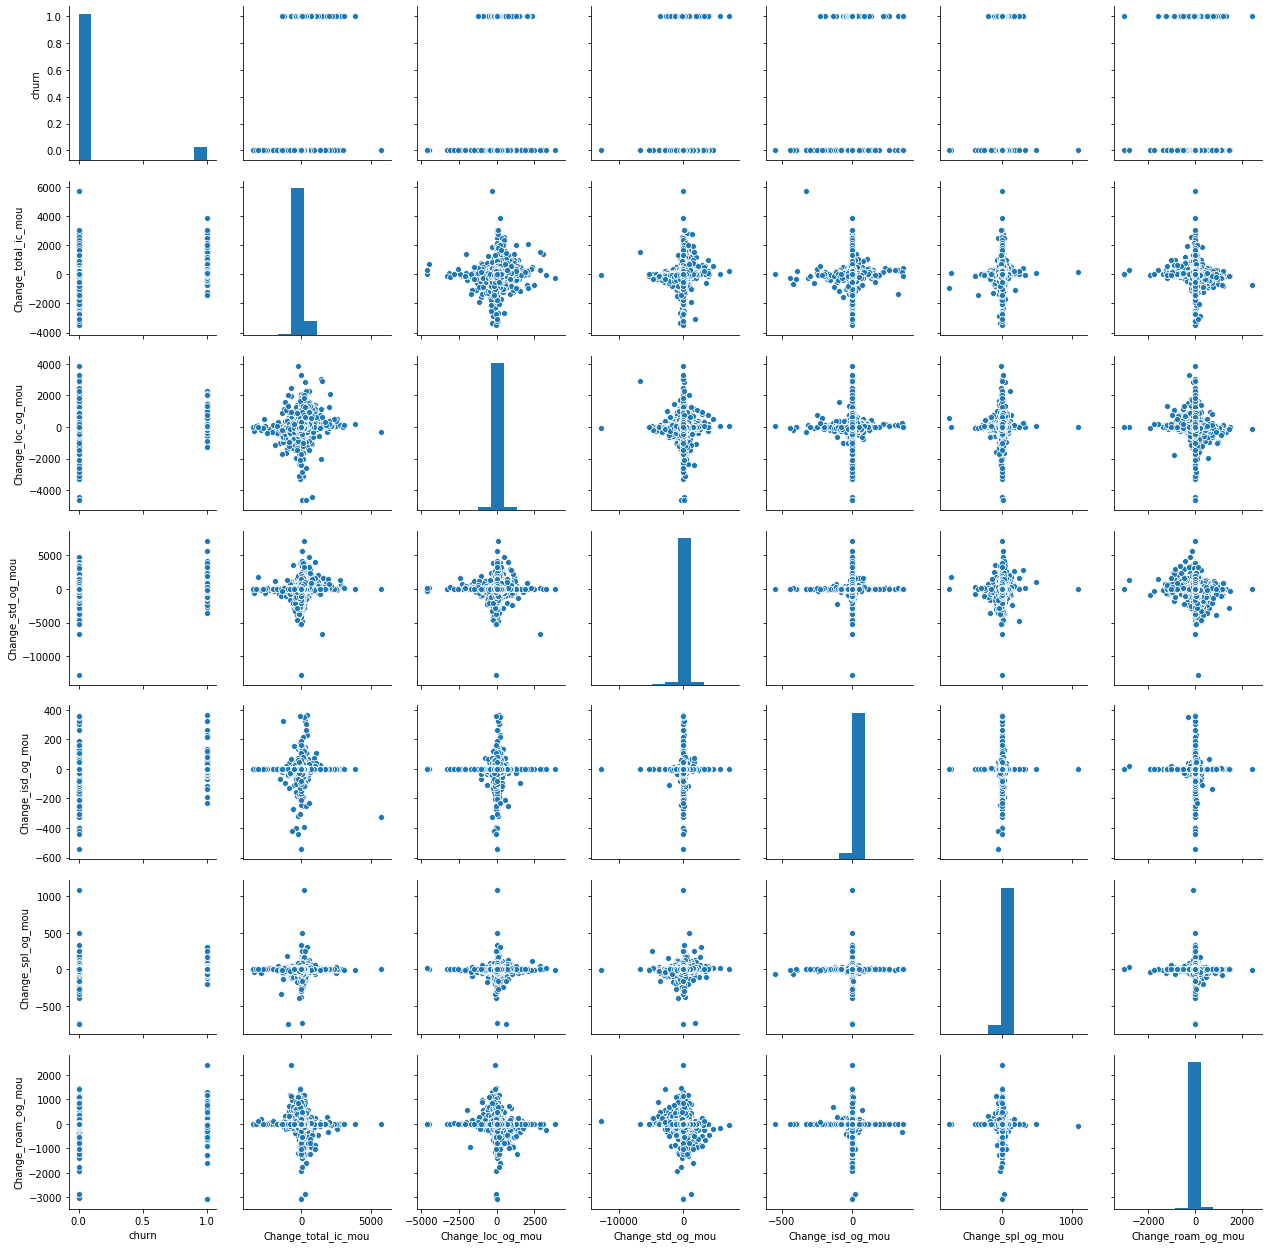

In [107]:
Churn_relation = telecom_churn[var_list_2]
sns.pairplot(Churn_relation)
plt.show()

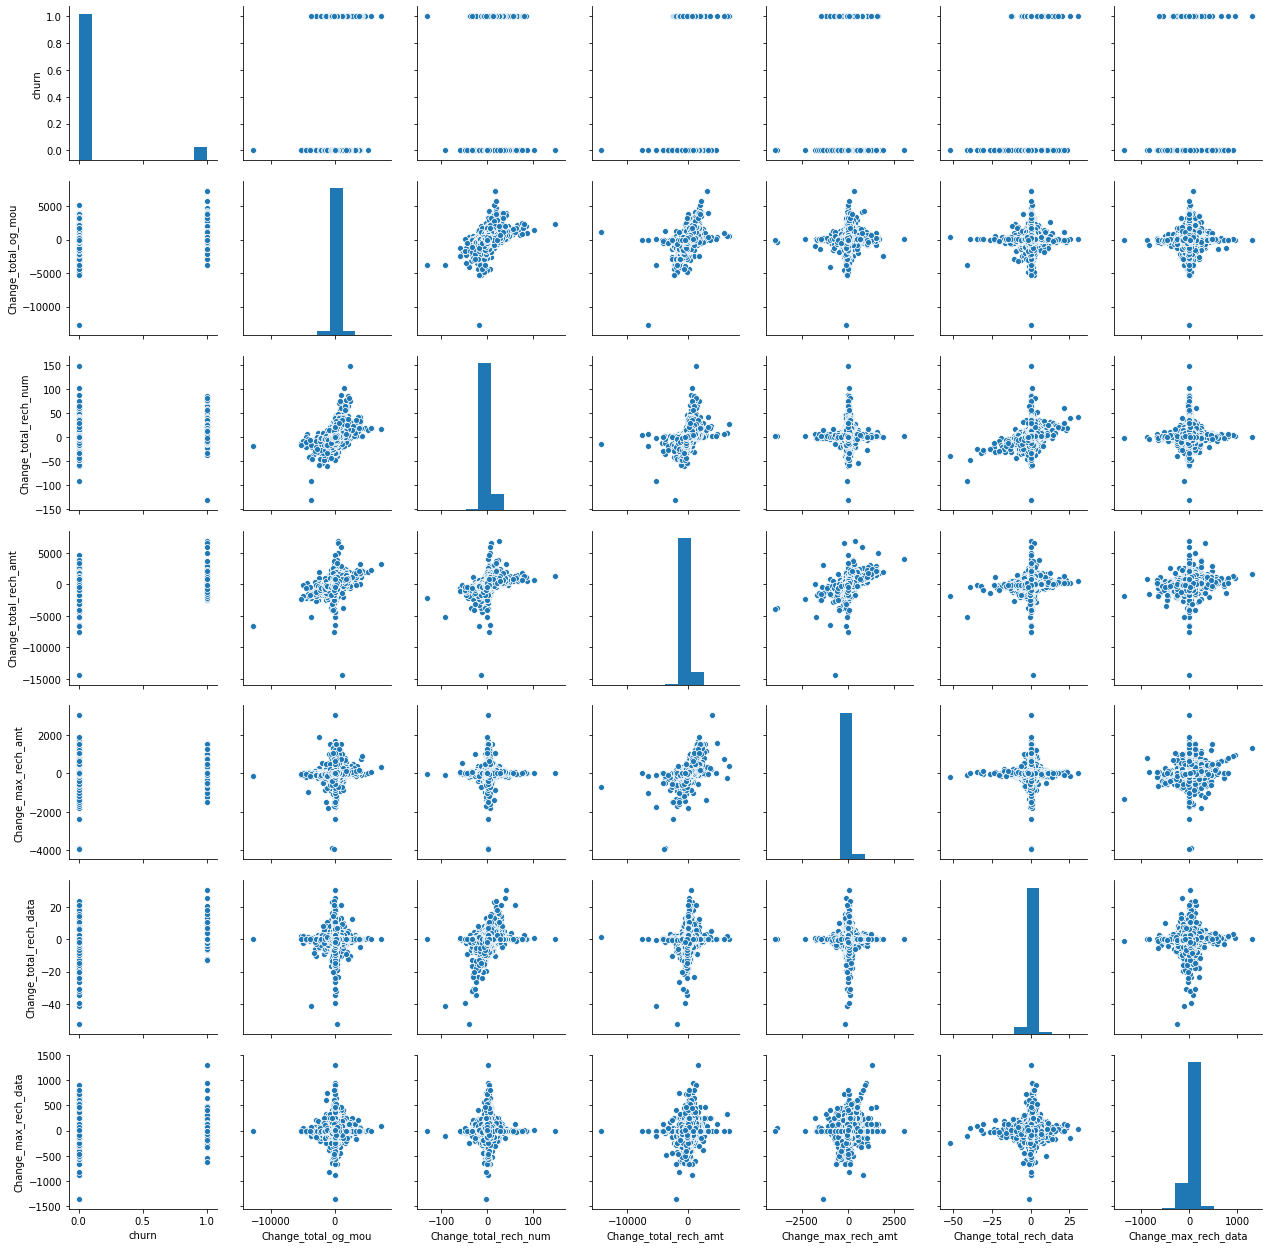

In [108]:
Churn_relation = telecom_churn[var_list_3]
sns.pairplot(Churn_relation)
plt.show()

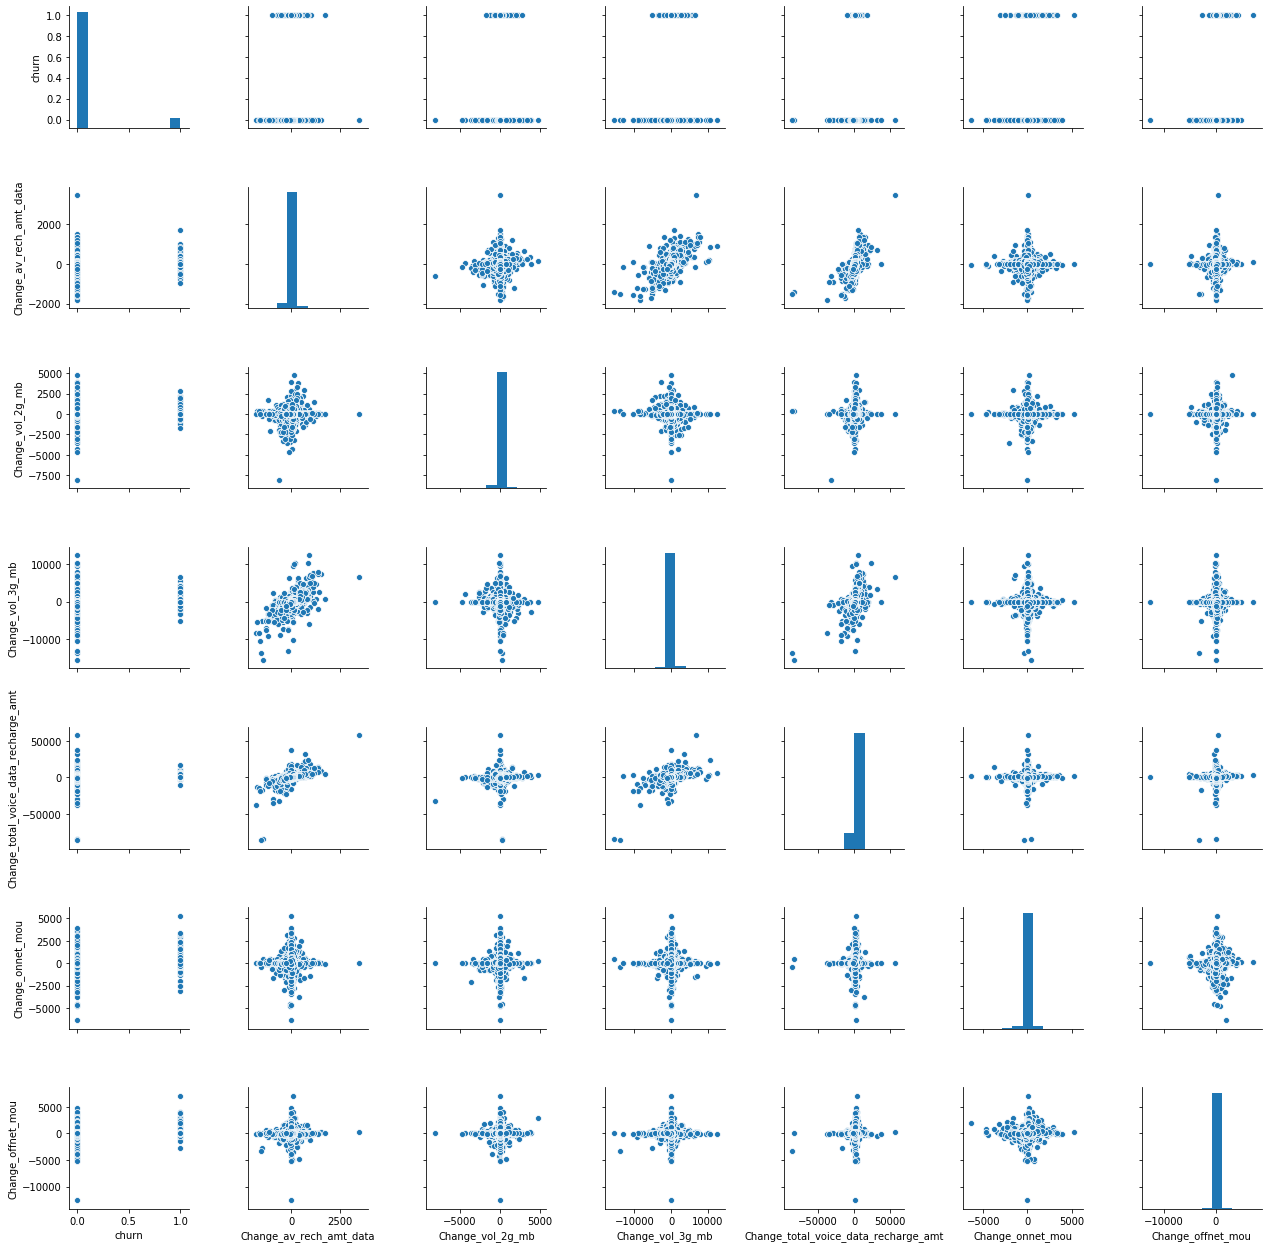

In [109]:
Churn_relation = telecom_churn[var_list_4]
sns.pairplot(Churn_relation)
plt.show()

In [114]:
def plot_hist(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='lightblue', edgecolor='gray')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    # Give ourselves some more room at the bottom of the plot
    #plt.subplots_adjust(bottom=0.15)
    plt.show()
    

#### customer using network (aon):

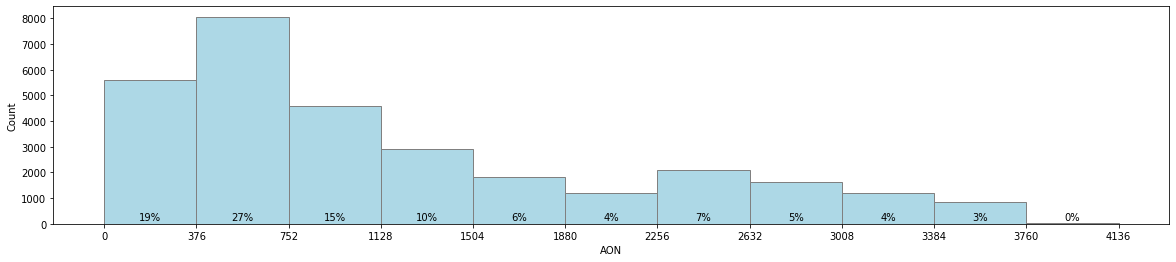

In [115]:
# Histogram of 'aon' with 10 bins

telecom_churn.aon=telecom_churn.aon.astype(int)
binwidth_aon = (max(telecom_churn['aon'])-min(telecom_churn['aon']))/11
plot_hist(telecom_churn, 'aon',binwidth_aon)

#### Insights:

* 19% HVC customer are using the current network only for last one year 
* 27% HVC customer are using around 2 years
* 29% HVC customers are attached with the network provider for more than 4 years(>1504 days)

#### Average minutes outgoing call uses 



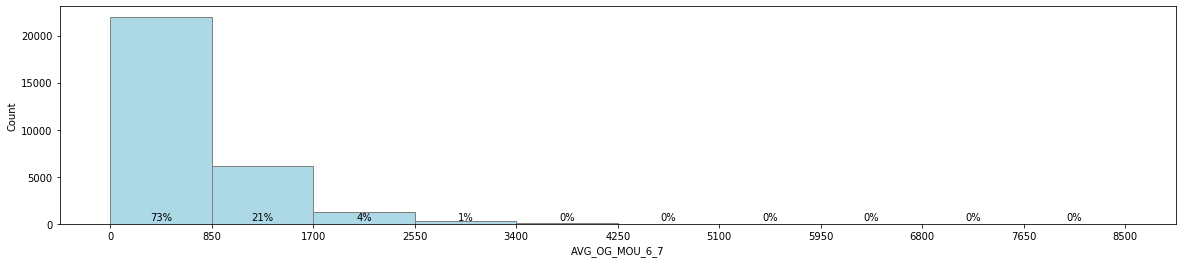

In [116]:
### during good phase (Month June and July)

telecom_churn['Avg_og_mou_6_7'] = (telecom_churn['total_og_mou_6']+telecom_churn['total_og_mou_7'])/2

telecom_churn.Avg_og_mou_6_7 = telecom_churn.Avg_og_mou_6_7.astype(int)

binwidth_x = (max(telecom_churn['Avg_og_mou_6_7'])-min(telecom_churn['Avg_og_mou_6_7']))/11

plot_hist(telecom_churn, 'Avg_og_mou_6_7',binwidth_x)

##### Insights:

* 73% HVC customer's total outgoing calls during good phase (avg. of June and July)is around 850 minutes.
* 21% HVC customer's total outgoing uses 1700 minutes 

#### Average minutes incoming call uses during good phase ((total_ic_mou_6+total_ic_mou_7)/2)

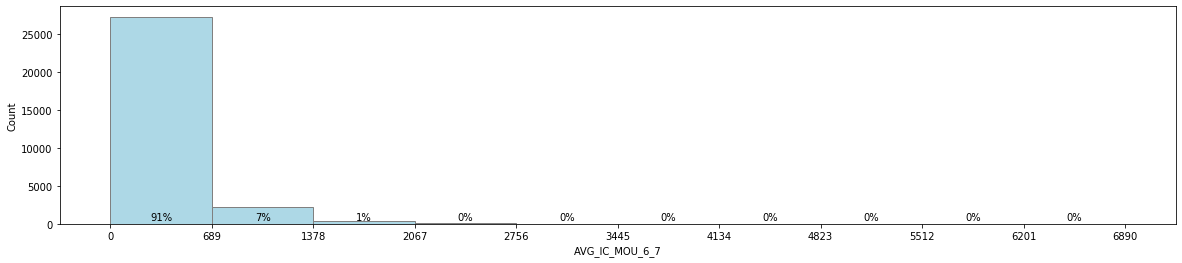

In [117]:
telecom_churn['Avg_ic_mou_6_7'] = (telecom_churn['total_ic_mou_6']+telecom_churn['total_ic_mou_7'])/2

telecom_churn.Avg_ic_mou_6_7 = telecom_churn.Avg_ic_mou_6_7.astype(int)

binwidth_x = (max(telecom_churn['Avg_ic_mou_6_7'])-min(telecom_churn['Avg_ic_mou_6_7']))/11

plot_hist(telecom_churn, 'Avg_ic_mou_6_7',binwidth_x)

##### Insights:

* 91% HVC customer's total incoming calls during good phase (avg. of June and July)is around 690 minutes.
* 7% HVC customer's total incoming uses 1380 minutes 

#### Analyzing incoming and outgoing total usage (minutes) as per month

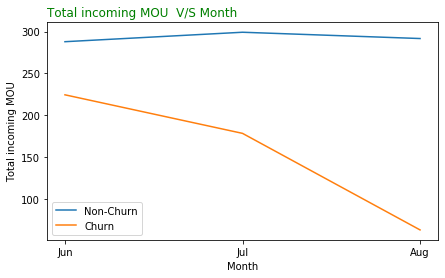

In [203]:
##  Incoming usage

fig, ax = plt.subplots(figsize=(7,4))
df=telecom_churn.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    
plt.legend(['Non-Churn', 'Churn'])
    
plt.title("Total incoming MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='green')
plt.xlabel("Month")
plt.ylabel("Total incoming MOU")
plt.show()

#### Insights:

* Incoming calls for non- churn customers are almost same in Good phase as well as Action phase
* For incoming calls customers are using very less of the current mobile number in Action phase 

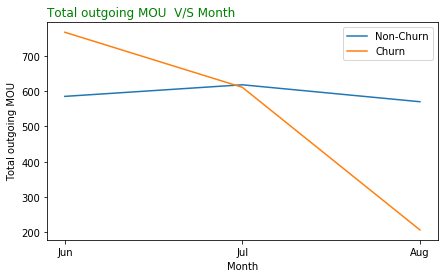

In [204]:
##  Outgoing usage

fig, ax = plt.subplots(figsize=(7,4))
df=telecom_churn.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    
plt.legend(['Non-Churn', 'Churn'])
    
plt.title("Total outgoing MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='green')
plt.xlabel("Month")
plt.ylabel("Total outgoing MOU")
plt.show()

#### Insights

* Outgoing calls for non- churn customers are almost same in Good phase as well as Action phase

* Outgoing calls for churnn customers drop drastically from Good phase to Action phase

#### Analysis of Incoming and Outgoing roaming usage (minutes)

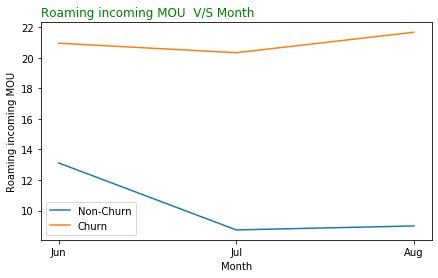

In [207]:
##  Roaming Incoming usage

fig, ax = plt.subplots(figsize=(7,4))
df=telecom_churn.groupby(['churn'])['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    
plt.legend(['Non-Churn', 'Churn'])
    
plt.title("Roaming incoming MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='green')
plt.xlabel("Month")
plt.ylabel("Roaming incoming MOU")
plt.show()

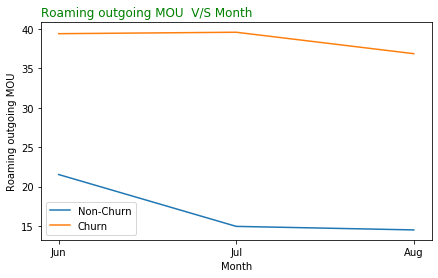

In [208]:
##  Roaming outgoing usage

fig, ax = plt.subplots(figsize=(7,4))
df=telecom_churn.groupby(['churn'])['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    
plt.legend(['Non-Churn', 'Churn'])
    
plt.title("Roaming outgoing MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='green')
plt.xlabel("Month")
plt.ylabel("Roaming outgoing MOU")
plt.show()

#### Analysis of Total recharge amount

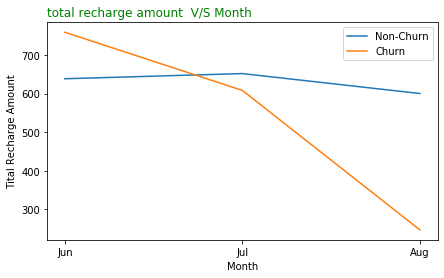

In [209]:
##  Tital recharge amount

fig, ax = plt.subplots(figsize=(7,4))
df=telecom_churn.groupby(['churn'])['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    
plt.legend(['Non-Churn', 'Churn'])
    
plt.title("total recharge amount  V/S Month", loc='left', fontsize=12, fontweight=0, color='green')
plt.xlabel("Month")
plt.ylabel("Tital Recharge Amount")
plt.show()

#### Insights

* Total recharge amount for non-churn customers are almost same in Good phase as well as Action phase

* Total recharge amount for churnn customers drop drastically from Good phase to Action phase

## Step 7: Outlier Treatment

In [118]:
# Checking outliers:

telecom_churn.describe(percentiles=[.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    260.486275   
std     6.908784e+05    460.640461    479.776947    501.961981    459.826489   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000    -92.562924   
25%     7.000609e+09    309.865000    309.826000    231.473000     17.090000   
50%     7.001203e+09    481.694000    480.943000    427.585000     84.580000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.440000   
90%     7.002165e+09    994.099000    995.859000    977.345000    754.160000   
95%     7.002285e+09   1240.964000   1261.272000   1255.019000   1135.440000   
99%     7.002386e+09   1985.115000   1999.500000   1986.622000   2151.740000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     268.826226    236.925585    376.439930    380.980774    338.843935   
std      479.810754    458.314740    481.939837    498.301717    479.910478   
min        0.000000     -2.602219      0.000000      0.000000      0.000000   
25%       18.310000     13.890000     77.878156     76.310000     61.330000   
50%       83.190000     68.480000    223.840000    221.530000    183.680000   
75%      290.910000    244.530000    489.660000    495.090000    438.990000   
90%      785.030000    668.640000    897.990000    918.430000    823.680000   
95%     1187.790000   1077.360000   1257.960000   1276.890000   1167.540000   
99%     2201.960000   2159.110000   2334.860000   2411.410000   2193.130000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       16.270051      12.669368      12.771743      26.816269   
std        76.382825      75.853370      74.459149     116.183862   
min         0.000000      -3.872893      -8.313981       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        27.610000      14.530000      15.840000      50.860000   
95%        85.840000      56.060000      57.492157     145.610000   
99%       344.890000     281.990000     284.060000     530.710000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       20.410414      20.200392         85.114118         86.649014   
std        96.093373     104.890187        228.637722        240.746693   
min       -25.733246     -18.314362        -46.510417          0.000000   
25%         0.000000       0.000000          5.230000          5.530000   
50%         0.000000       0.000000         25.910000         26.239693   
75%         0.000000       0.000000         78.280000         79.010000   
90%        32.160000      30.880000        187.940000        191.440000   
95%       104.440000     102.340000        322.790000        326.160000   
99%       438.590000     427.110000       1006.360000       1022.280000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          79.711345        164.652593        163.842750        154.244158   
std          227.772238        249.536012        241.663038        232.814440   
min            0.000000          0.000000  

#### Note:

Formost of the features, difference between 99th percentile and maximum value is quite high. So we would do outlier treatment with very simple way

In [119]:
telecom_churn.shape

(30001, 180)

In [120]:
capping_var = [var for var in telecom_churn.columns if var not in ["churn","mobile_number","fb_user_6","fb_user_7","fb_user_8",
"fb_user_9","night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9"]]

for var in capping_var:
    percentiles = telecom_churn[var].quantile([0.01,0.99]).values
    telecom_churn[var][telecom_churn[var] <= percentiles[0]] = percentiles[0]
    telecom_churn[var][telecom_churn[var] >= percentiles[1]] = percentiles[1]

In [121]:
telecom_churn.describe(percentiles=[.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    548.809784    551.084737    498.243103    251.943154   
std     6.908784e+05    358.130151    360.433210    383.295094    403.653730   
min     7.000000e+09      1.000000      0.700000      0.000000    -14.958341   
25%     7.000609e+09    309.865000    309.826000    231.473000     17.090000   
50%     7.001203e+09    481.694000    480.943000    427.585000     84.580000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.440000   
90%     7.002165e+09    994.099000    995.859000    977.345000    754.160000   
95%     7.002285e+09   1240.964000   1261.272000   1255.019000   1135.440000   
99%     7.002386e+09   1985.115000   1999.500000   1986.622000   2151.740000   
max     7.002411e+09   1985.115000   1999.500000   1986.622000   2151.740000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     259.630587    227.722943    368.713834    372.394545    328.805845   
std      417.978853    390.757904    433.937501    443.274617    407.312988   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       18.310000     13.890000     77.878156     76.310000     61.330000   
50%       83.190000     68.480000    223.840000    221.530000    183.680000   
75%      290.910000    244.530000    489.660000    495.090000    438.990000   
90%      785.030000    668.640000    897.990000    918.430000    823.680000   
95%     1187.790000   1077.360000   1257.960000   1276.890000   1167.540000   
99%     2201.960000   2159.110000   2334.860000   2411.410000   2193.130000   
max     2201.960000   2159.110000   2334.860000   2411.410000   2193.130000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       13.754781       9.675416      10.023659      22.977217   
std        49.616207      38.914003      39.352937      79.292657   
min         0.000000      -2.358291       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        27.610000      14.530000      15.840000      50.860000   
95%        85.840000      56.060000      57.492157     145.610000   
99%       344.890000     281.990000     284.060000     530.710000   
max       344.890000     281.990000     284.060000     530.710000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       16.953059      16.320114         76.909624         77.690186   
std        62.864116      60.754439        149.684044        151.427446   
min         0.000000      -2.225407          0.000000          0.000000   
25%         0.000000       0.000000          5.230000          5.530000   
50%         0.000000       0.000000         25.910000         26.239693   
75%         0.000000       0.000000         78.280000         79.010000   
90%        32.160000      30.880000        187.940000        191.440000   
95%       104.440000     102.340000        322.790000        326.160000   
99%       438.590000     427.110000       1006.360000       1022.280000   
max       438.590000     427.110000       1006.360000       1022.280000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          71.373399        159.074884        159.018763        149.792738   
std          137.547136        211.916522        209.555967        203.112059   
min            0.000000          0.000000  

## Step 8: Modeling

Our objective is to predict the High Value Customer who has high chances to churn after Action phase. Also we have to find the main driving factors for churn. We have huge number of features and many of them are highly correlated. So it would be better to start with Principal component Analysis(PCA) to reduce the number of features and then build few Classification models and select the best one for the 1st part of our objective. On the otherhand, for the 2nd part of the objective we can build Logistic regression or Random forest algorithm with different features(without running PCA) to find out the main driver of customer churn.

To meet our objective we will follow below steps:

   * create dummy from categorical variables
   * Test-Train split and Scaling of variables
   * Handling data imbalance
   * Build PCA and few Classification models
   * Build Classification model without using PCA & select best model
   * Identify main features which have most effect on Customer churn
   * Recommend strategies to manage customer churn


### Import required packages

In [122]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# importing Logistic Regression module
from sklearn.linear_model import LogisticRegression

# importing cross validation module
from sklearn.model_selection import cross_val_score

# importing Decision Tree module
from sklearn.tree import DecisionTreeClassifier

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

#Improting the PCA module
from sklearn.decomposition import PCA


### i) Creating dummy variables from different Categorical variables


In [123]:

telecom_churn_1 = telecom_churn.copy()

def create_dummy(var1,df):
    pref = var1+'_'
    x = pd.get_dummies(df[var1], prefix = pref, drop_first = True)
    df = pd.concat([df,x], axis =1)
    df = df.drop([var1], axis = 1)
    return df

telecom_churn_1 =create_dummy('fb_user_6',telecom_churn_1)
telecom_churn_1 =create_dummy('fb_user_7',telecom_churn_1)
telecom_churn_1 =create_dummy('fb_user_8',telecom_churn_1)
telecom_churn_1 =create_dummy('night_pck_user_6',telecom_churn_1)
telecom_churn_1 =create_dummy('night_pck_user_7',telecom_churn_1)
telecom_churn_1 =create_dummy('night_pck_user_8',telecom_churn_1)

telecom_churn_1.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7.000843e+09   197.385   214.816   213.803   -14.958341      10.3163   
1   7.000702e+09  1069.180  1349.850  1986.622    57.840000      54.6800   
2   7.001525e+09   378.721   492.223   137.362   413.690000     351.0300   
3   7.002124e+09   514.453   597.753   637.760   102.410000     132.1100   
4   7.000887e+09    74.350   193.897   366.966    48.960000      50.6600   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00     92.156432    109.061633          0.00         3.4397   
1        52.29    453.430000    567.160000        325.91        16.2300   
2        35.08     94.660000     80.630000        136.48         0.0000   
3        85.14    757.930000    896.680000        983.39         0.0000   
4        33.58     85.410000     89.360000        205.89         0.0000   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -2.358291           0.00       9.263538       9.615532           0.00   
1      33.490000          31.64      23.740000      12.590000          38.06   
2       0.000000           0.00       0.000000       0.000000           0.00   
3       0.000000           0.00       0.000000       0.000000           0.00   
4       0.000000           0.00       0.000000       0.000000           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         20.872488         37.132101              0.00         89.005006   
1         51.390000         31.380000             40.28        308.630000   
2        297.130000        217.590000             12.49         80.960000   
3          4.480000          6.160000             23.34         91.810000   
4         48.960000         50.660000             33.58         82.940000   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         34.779551              0.00          3.709877          0.281652   
1        447.380000            162.28         62.130000         55.140000   
2         70.580000             50.54          0.000000          0.000000   
3         87.930000            104.81          0.750000          0.000000   
4         83.010000            148.56          0.000000          0.000000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00          0.310699          0.260356              0.00   
1             53.23          0.000000          0.000000              0.00   
2              0.00          0.000000          0.000000              7.15   
3              1.58          0.000000          0.000000              0.00   
4              0.00          0.000000          0.000000             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0      66.99918    179.320786          0.00        -33.146294   
1     422.16000    533.910000        255.79          4.300000   
2     378.09000    288.180000         63.04        116.560000   
3      97.04000     94.090000        129.74         97.930000   
4     131.91000    133.680000        182.14          0.000000   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0          5.062388              0.00         21.579475          7.108721   
1         23.290000             12.01         49.890000         31.760000   
2        133.430000             22.58         13.690000         10.040000   
3        125.940000             61.79        665.360000        808.740000   
4          0.000000              0.00          2.360000          6.350000   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00          0.681735          0.428885              0.00   
1             49.14          6.660000         20.080000             16.68   
2             75.69          0.000000          0.000000              0.00   
3            876.99          0.000000          0.000000        

### ii) Test-Train split and Scaling of variables

1)  Before model building, we have to devide the data in Train and Test. We will develop the model on Train data. 
    After developing the model, we will evaluate it on Test data. For Train- test, I am deviding the data in 
    70:30 ratio.
        
2) After spliting the data as Train and Test, we should scale the variables of Train data. Before evaluate the model on test data, we will scale the Test data in that same scale of train data. For scaling the variables we can consider two approach:
        - Normalise the data by min-max scalling
        - Standarised the data (mean-0, sigma-1)
        
   Here we will go for normalising the data by Standardising data  

In [124]:
#  Train-Test split in 70:30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(telecom_churn_1, train_size = 0.7, test_size = 0.3, random_state = 100)


#### Note:
specify random.seed, so that the train and test data set always have the same rows, respectively. Otherwise each run will generate new data sample for Train and Test

In [125]:
# Scalling the numeric variables 
#scaler = StandardScaler()
scaler = MinMaxScaler()

In [126]:
scaling_var = [var for var in telecom_churn.columns if var not in ["churn","mobile_number","fb_user_6","fb_user_7","fb_user_8",
"fb_user_9","night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9", "fb_user_6__1.0", "fb_user_6__999.0", 
"fb_user_7__1.0", "fb_user_7__999.0", "fb_user_8__1.0", "fb_user_8__999.0", "night_pck_user_6__1.0", "night_pck_user_6__999.0",
"night_pck_user_7__1.0", "night_pck_user_7__999.0", "night_pck_user_8__1.0", "night_pck_user_8__999.0"]]#

In [127]:
#  Scale the training data

df_train[scaling_var] = scaler.fit_transform(df_train[scaling_var])
df_train.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
11785   7.001454e+09  0.547016  0.455072  0.298307     0.009530     0.003760   
11987   7.001929e+09  0.258230  0.155544  0.183289     0.073775     0.022634   
11648   7.000952e+09  0.149848  0.156834  0.157759     0.038902     0.035010   
12890   7.000752e+09  0.622020  0.161582  0.355095     1.000000     0.075315   
3762    7.000346e+09  0.220192  0.228546  0.132992     0.015041     0.020872   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
11785     0.002242      0.065053      0.065941      0.044712       0.083969   
11987     0.018855      0.137541      0.094397      0.121019       0.000000   
11648     0.038571      0.142741      0.123737      0.097276       0.051408   
12890     0.323022      0.201280      0.083325      0.253081       0.000000   
3762      0.011065      0.080018      0.125263      0.037234       0.000000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
11785       0.102052       0.109519       0.011551       0.032787   
11987       0.008294       0.000000       0.000000       0.000000   
11648       0.156985       0.240829       0.043319       0.048633   
12890       0.148122       0.080300       0.000000       0.076404   
3762        0.008294       0.000000       0.000000       0.000000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
11785       0.028149          0.005356          0.007229          0.005276   
11987       0.005183          0.064053          0.029914          0.044380   
11648       0.183808          0.021404          0.011357          0.028932   
12890       0.060059          0.041069          0.031968          0.691031   
3762        0.005183          0.013792          0.028104          0.013093   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
11785          0.019024          0.027481          0.018203          0.013578   
11987          0.244019          0.161344          0.194393          0.138521   
11648          0.184844          0.196391          0.116998          0.035714   
12890          0.238540          0.130601          0.329125          0.016545   
3762           0.160498          0.247003          0.071744          0.044614   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
11785          0.000000          0.000000               0.0          0.228735   
11987          0.059308          0.419990               0.0          0.590064   
11648          0.079918          0.000000               0.0          0.000000   
12890          0.252920          0.230545               0.0          0.000000   
3762           0.287726          0.043531               0.0          0.000000   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
11785          0.038883      0.015782      0.021753      0.014830   
11987          0.000000      0.197933      0.123318      0.172497   
11648          0.000000      0.131284      0.135821      0.092542   
12890          0.084129      0.175532      0.114612      0.608043   
3762           0.000000      0.111964      0.188278      0.056338   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
11785          0.017288          0.000000          0.013724          0.001337   
11987          0.059237          0.010046          0.013724          0.016158   
11648          0.039996          0.031917          0.027728          0.051849   
12890          1.000000          0.069447          0.031682          0.084702   
3762           0.019244          0.007203          0.019849          0.000000   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
11785          0.005155          0.019601          0.000000          0.000000   
11987          0.009273          0.022745          0.000000          0.171039   
11648          0.026407          0.032958       

In [128]:
# Scale the test data with the same scale of train

df_test[scaling_var] = scaler.transform(df_test[scaling_var])
df_test.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
6102    7.000913e+09  0.271275  0.268599  0.141463     0.014247     0.002502   
2539    7.000409e+09  0.039529  0.103812  0.039682     0.014233     0.004237   
21576   7.000903e+09  0.360824  0.360767  0.314850     0.167429     0.103253   
19574   7.001270e+09  0.230588  0.243245  0.231043     0.043563     0.029524   
12804   7.000931e+09  0.304301  0.201144  0.047845     0.309364     0.174077   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
6102      0.003701      0.023231      0.006162      0.010195       0.000000   
2539      0.004381      0.011397      0.008850      0.001623       0.016701   
21576     0.107850      0.350848      0.335609      0.396912       0.000000   
19574     0.053559      0.149422      0.112913      0.101517       0.000000   
12804     0.021958      0.065306      0.051779      0.002398       0.000000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
6102        0.008294       0.000000        0.00000       0.000000   
2539        0.008294       0.011899        0.00733       0.023439   
21576       0.008294       0.000000        0.00000       0.000000   
19574       0.008294       0.000000        0.00000       0.000000   
12804       0.008294       0.120890        0.00000       0.000000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
6102        0.005183          0.003488          0.003140          0.008710   
2539        0.016969          0.007840          0.000939          0.003151   
21576       0.005183          0.311111          0.159408          0.173431   
19574       0.005183          0.066487          0.042347          0.124996   
12804       0.097955          0.008705          0.006241          0.000000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
6102           0.039562          0.003963          0.012855          0.040849   
2539           0.000976          0.003649          0.000074          0.000000   
21576          0.660542          0.626665          0.596071          0.040507   
19574          0.206806          0.152438          0.147026          0.020424   
12804          0.086837          0.104100          0.002352          0.000000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
6102           0.017289          0.020550          0.001203          0.000000   
2539           0.000000          0.000000          0.765437          0.355969   
21576          0.000000          0.031493          0.000000          0.000000   
19574          0.049347          0.000000          0.000000          0.043960   
12804          0.000000          0.000000          0.387330          0.429235   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
6102           0.000000      0.029115      0.005235      0.014247   
2539           0.096501      0.005037      0.002881      0.001792   
21576          0.354896      0.596862      0.492738      0.487374   
19574          0.000000      0.169858      0.124423      0.165190   
12804          0.000000      0.060091      0.070007      0.001540   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
6102           0.023750          0.001200          0.013724          0.002387   
2539           0.019483          0.003954          0.014884          0.000000   
21576          0.035391          0.033586          0.051755          0.023683   
19574          0.023812          0.011324          0.014229          0.057345   
12804          0.354516          0.196611          0.019024          0.020814   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
6102           0.004227          0.015680          0.024975          0.000000   
2539           0.000156          0.012688          0.000000          0.000000   
21576          0.051678          0.117112       

In [129]:
# Churn percentage in train and test data

train_churn_counts = df_train['churn'].value_counts()
train_churn_pct = round(df_train['churn'].value_counts(normalize = True)*100,1)

test_churn_counts = df_test['churn'].value_counts()
test_churn_pct = round(df_test['churn'].value_counts(normalize = True)*100,1)

churn_summary = pd.DataFrame({"train_churn_counts": train_churn_counts, "train_churn_pct": train_churn_pct,"test_churn_counts": test_churn_counts, "test_churn_pct": test_churn_pct }).reset_index()
churn_summary

index  train_churn_counts  train_churn_pct  test_churn_counts  \
0      0               19309             91.9               8251   
1      1                1691              8.1                750   

   test_churn_pct  
0            91.7  
1             8.3

#### Note:

After splitting the data in train and test in 70:30, in train data churn percentage is 8.1% where as in test data, churn percentage is 8.3%. Though both train and test, percentage of churn are in similar trend, both the data has class imbalance. So we have to handel class imbalances.

In [130]:
# Spliting dependent and independent variables from train and test data

X_train = df_train.drop(['churn', 'mobile_number'],axis=1)
y_train = df_train['churn']

X_test = df_test.drop(['churn', 'mobile_number'],axis=1)
y_test = df_test['churn']


### iii) Handling class imbalance

when the number of observations belonging to one class is significantly lower than those belonging to the other classes in the data, then that problem is known as class imbalance/imbalance data. 

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.
So it is better to handel class imbalance before using those algorithms.

##### Here we will use Synthetic Minority Over-sampling Technique (SMOTE) technique. 

This technique works in below way:
A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.


#### Applying Synthetic Minority Over-sampling Technique (SMOTE)

In [131]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 0)

X_train_SMOTE,y_train_SMOTE = sm.fit_sample(X_train,y_train)

print(X_train_SMOTE.shape)
print(y_train_SMOTE.shape)

np.count_nonzero(y_train_SMOTE)

(38618, 184)
(38618,)


19309

In [132]:
# Check the percentage  of dependent variable after apply SMOTE

(y_train_SMOTE != 0).sum()/len(y_train_SMOTE.index)*100


50.0

#### Note:
 1) After handling imbalance data by SMOTE, Churn percentage became 50% in train data
##### 2) We should not use SMOTE on test data. Otherwisw test data would be inflated with synthetic records. We should validate the model only on original data

### iv) Build PCA and later Classification models

As per business, our first objective is to predict High Value Customers who has high possibility of churn. For that we have to build some classification model. But our dataset contains lot of variables and many of them are highly correlated. So we can use Principal component analysis (PCA) to reduce number of variables and later by using principal components we can build classification model to solve our objective.

After PCA, as a base model, we will use Logistic regression as base model. Later we will try some more classification model and select the best one after considering performance as well as business usefulness. 

### Principal Component Analysis (PCA)

In [133]:
X_train_SMOTE.shape

(38618, 184)

In [134]:
#Improting the PCA module
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=42)

#Doing the PCA on the train data
pca.fit(X_train_SMOTE)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Checking the Screeplot to understand how many Principal component explains how much variance of data

In [135]:
pca.explained_variance_ratio_[:50]

array([0.29130913, 0.0890326 , 0.05968763, 0.05122979, 0.04614483,
       0.04429697, 0.03059411, 0.02392902, 0.0225514 , 0.01945789,
       0.01709827, 0.01213432, 0.01163701, 0.01070978, 0.01001903,
       0.00928832, 0.00895411, 0.0087572 , 0.00834745, 0.00794929,
       0.00776747, 0.00743427, 0.0072682 , 0.00713663, 0.00692173,
       0.0065165 , 0.00624104, 0.00601215, 0.00595605, 0.00546987,
       0.00501434, 0.00479031, 0.00473849, 0.00449083, 0.00436176,
       0.00396532, 0.00386597, 0.00364928, 0.00358536, 0.0035774 ,
       0.00341995, 0.00335205, 0.00324122, 0.00318599, 0.00307566,
       0.00300056, 0.00294618, 0.0026882 , 0.00256982, 0.00255578])

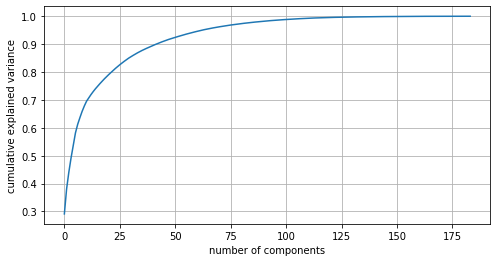

In [136]:
# plotting the cumulative variance against the number of components

%matplotlib inline

fig = plt.figure(figsize = (8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()

#### Note:

55 principal components explaining around 95% variance of the data.

In [137]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=55)

In [138]:
X_train_pca = pca_final.fit_transform(X_train_SMOTE)
X_train_pca.shape

(38618, 55)

In [139]:
# check correlation matrix for the principal components

corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)


max corr: 0.00974374105536972 , min corr:  -0.007386213787403796


#### Note:

We can see that correlation between the principal components are bear to zero.

In [140]:
#Applying selected components to the test data - 55 components

X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 55)


### Now our data is ready for classification model building
We will use below classification algorithms and select the best one

  * **Logistic Regression**
  * **Decision Tree**
  * **Random Forest**
   

#### Defining few function for recursive use during different model building

In [141]:

def model_fit_eva(algorithm, X_train, y_train):
    
    algorithm.fit(X_train, y_train)        
    
    pred = algorithm.predict(X_train)
    prob = algorithm.predict_proba(X_train)[:,1]    
   
    cv_score = cross_val_score(algorithm, X_train, y_train, cv=5, scoring='roc_auc')
      
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, pred))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, pred))
    print ("Precision : %.4g" % metrics.precision_score(y_train, pred))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, prob))    
   

In [142]:
def model_val(actual_y = False, pred_y = False):

    confusion = metrics.confusion_matrix(actual_y, pred_y)

    TP = confusion[1,1] 
    TN = confusion[0,0] 
    FP = confusion[0,1] 
    FN = confusion[1,0] 

    
    print('Accuracy: {}'.format((TP+TN) / float(TP+TN+FP+FN)))
    print('Recall/Sensitivity : {}'.format(TP / float(TP+FN)))      
    print('Precision: {}'.format(TP / float(TP+FP)))
    print("AUC Score: {}".format(metrics.roc_auc_score(actual_y,pred_y)))
    print('predicting churn when customer does not have churned(FPR): {}'.format(FP/ float(TN+FP)))
    print("F1 Score: {}".format(metrics.f1_score(actual_y,pred_y)))
   

In [143]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

### a) Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [273]:
#lr = LogisticRegression()
#lr_pca = lr.fit(X_train_pca,y_train_SMOTE)


In [145]:
lr = LogisticRegression()
model_fit_eva(lr,X_train_pca,y_train_SMOTE)

Accuracy : 0.8404
Recall/Sensitivity : 0.8508
Precision : 0.8334
AUC Score (Train): 0.910556


In [146]:
# predictions on Test data
pred_probs_test = lr.predict(X_test_pca)
model_val(y_test,pred_probs_test)

Accuracy: 0.8377958004666148
Recall/Sensitivity : 0.8226666666666667
Precision: 0.31738683127572015
AUC Score: 0.8309188381206318
predicting churn when customer does not have churned(FPR): 0.16082899042540297
F1 Score: 0.4580549368968077


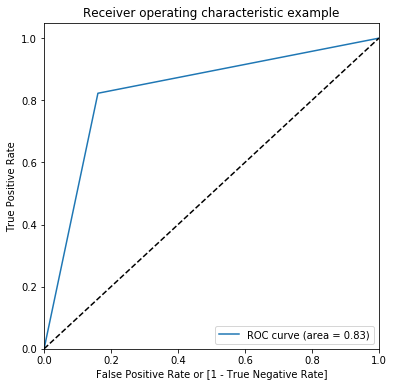

(array([0.        , 0.16082899, 1.        ]),
 array([0.        , 0.82266667, 1.        ]),
 array([2, 1, 0]))

In [147]:
draw_roc(y_test,pred_probs_test)

#### Note: Logistic Regression evaluation summary

Training Accuracy: **84.04%** ,Training Recall: **85.08%** 

Test Accuracy: **83.77%**, Test recall: **82.26%**

Logistic Regression algorithm is working very well. Here difference of Train and Test metrices are quite low.

### b) Decision Tree

In [148]:
# Fitting the decision tree with default hyperparameters except max_depth

dt = DecisionTreeClassifier(max_depth=5)
model_fit_eva(dt,X_train_pca,y_train_SMOTE)

Accuracy : 0.807
Recall/Sensitivity : 0.7821
Precision : 0.823
AUC Score (Train): 0.870416


In [149]:
# predictions on Test data

pred_probs_test = dt.predict(X_test_pca)
model_val(y_test,pred_probs_test)

Accuracy: 0.8210198866792578
Recall/Sensitivity : 0.7346666666666667
Precision: 0.28069281711665817
AUC Score: 0.7817679473195167
predicting churn when customer does not have churned(FPR): 0.17113077202763302
F1 Score: 0.40619240692959824


#### Grid Search for max_depth 

In [150]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                    scoring="accuracy",
                    return_train_score = True)

tree.fit(X_train_pca,y_train_SMOTE)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [151]:
# scores of GridSearch CV
scores = tree.cv_results_

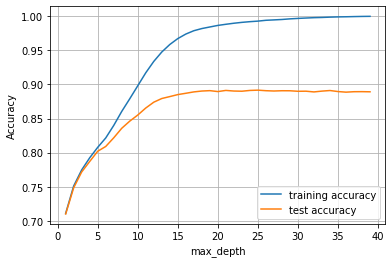

In [152]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## Note:

we can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 12, after which both train and test score are became constant. 

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** indicates the minimum number of samples required to be at a leaf.

In [153]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score = True)


tree.fit(X_train_pca,y_train_SMOTE)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             p

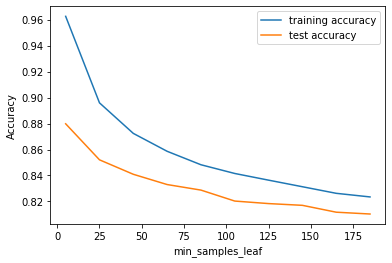

In [154]:
# scores of GridSearch CV
scores = tree.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### Note:
At values > 50, the model becomes more stable and the training and test accuracy start to converge.

### Tuning min_samples_split


The hyperparameter min_samples_split is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [155]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score = True)

tree.fit(X_train_pca,y_train_SMOTE)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             

In [156]:
# scores of GridSearch CV
scores = tree.cv_results_

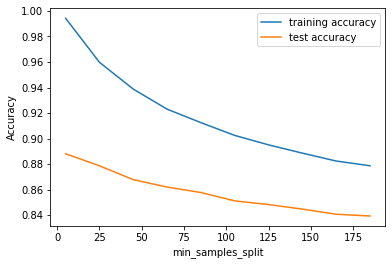

In [157]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Note:
At values > 75, the model becomes more stable and the training and test accuracy start to converge.

### Grid Search to Find Optimal Hyperparameters

In [158]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(40, 200, 50),
    'min_samples_split': range(50, 150, 25),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train_SMOTE)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 12.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [159]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8374074748846869
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


#### Running the model with best parameters obtained from grid search.

In [160]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=40,
                                  min_samples_split=50)

model_fit_eva(clf_gini,X_train_pca,y_train_SMOTE)

Accuracy : 0.8656
Recall/Sensitivity : 0.8738
Precision : 0.8597
AUC Score (Train): 0.936728


In [161]:
# predictions on Test data

pred_probs_test = clf_gini.predict(X_test_pca)
model_val(y_test,pred_probs_test)

Accuracy: 0.8291300966559271
Recall/Sensitivity : 0.7146666666666667
Precision: 0.28817204301075267
AUC Score: 0.7771006342665536
predicting churn when customer does not have churned(FPR): 0.16046539813355956
F1 Score: 0.41072796934865896


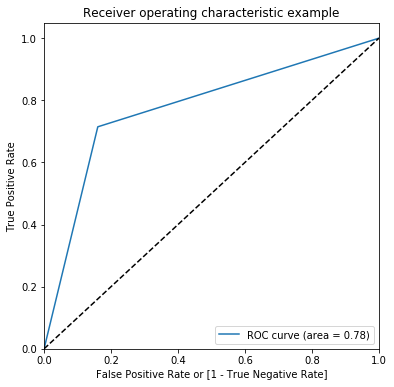

(array([0.       , 0.1604654, 1.       ]),
 array([0.        , 0.71466667, 1.        ]),
 array([2, 1, 0]))

In [162]:
draw_roc(y_test,pred_probs_test)

### Note: Decision Tree evaluation summary

Training Accuracy: **86.56%** ,Training Recall: **87.38%** 

Test Accuracy: **82.91%**, Test recall: **71.46%**

Accuracy of Decision Tree model is quite well but there is huge difference of recall in Training and Test set. As our target is to find out the maximum number of high risk HVC, we would give more importance on recall value.

### c) Random Forest

In [163]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [164]:
model_fit_eva(rfc,X_train_pca,y_train_SMOTE)

Accuracy : 1
Recall/Sensitivity : 1
Precision : 1
AUC Score (Train): 1.000000


In [165]:
# predictions on Test data

pred_probs_test = rfc.predict(X_test_pca)
model_val(y_test,pred_probs_test)

Accuracy: 0.916898122430841
Recall/Sensitivity : 0.524
Precision: 0.5012755102040817
AUC Score: 0.7383059023148709
predicting churn when customer does not have churned(FPR): 0.04738819537025815
F1 Score: 0.5123859191655802


#### Note:

Accuracy, Recall and Precision on training set of the Random Forest model is showing 100% which indicate the **overfitting of the modelPP**. Due to that we can see that those metricess score has been fallen a lot in test data. So we have to rgularize the model by tuning few hyper parameters.

### Hyperparameter Tuning

#### i) Tuning max_depth

The maximum depth of the tree. defaultvalue is None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [336]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score = True)


rf.fit(X_train_pca,y_train_SMOTE)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [337]:
# scores of GridSearch CV
scores = rf.cv_results_

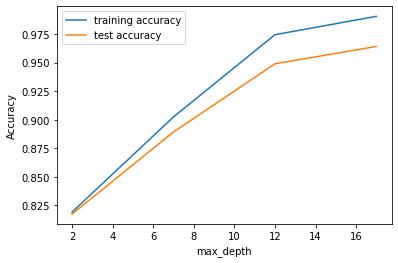

In [338]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### ii) Tuning n_estimators

The number of trees in the forest. integer, optional (default=10)

In [339]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                  cv=n_folds, 
                  scoring="accuracy",
                  return_train_score = True)

rf.fit(X_train_pca,y_train_SMOTE)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [340]:
# scores of GridSearch CV
scores = rf.cv_results_

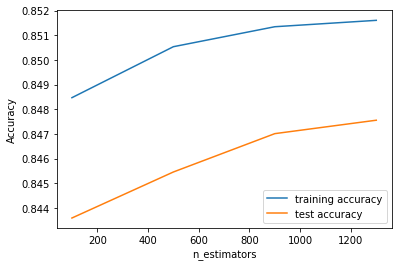

In [341]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### iii) Tuning max_features

max_features indicates the maximum numbre of features considered for splitting at a node.

In [345]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score = True)

rf.fit(X_train_pca,y_train_SMOTE)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [348]:
# scores of GridSearch CV
scores = rf.cv_results_

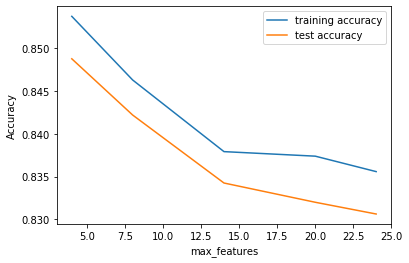

In [349]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### iv) Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [350]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score = True)

rf.fit(X_train_pca,y_train_SMOTE)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [351]:
# scores of GridSearch CV
scores = rf.cv_results_

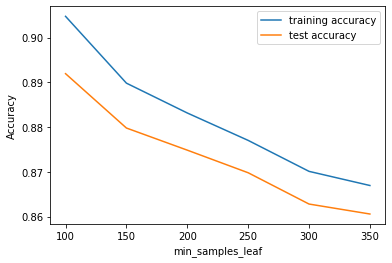

In [352]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### v) Tuning min_samples_split

int, float, optional (default=2)The minimum number of samples required to split an internal node:
    - If int, then consider min_samples_split as the minimum number.
    - If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.

In [353]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score = True)


rf.fit(X_train_pca,y_train_SMOTE)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [354]:
# scores of GridSearch CV
scores = rf.cv_results_

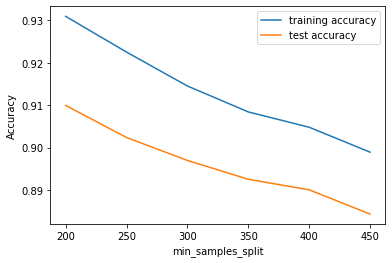

In [355]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [356]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(250, 400, 50),
    'n_estimators': [75,100,150], 
    'max_features': [5, 10, 12]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [357]:
# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train_SMOTE)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 70.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 140.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 267.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 421.4min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 573.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [358]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8808844816481054 using {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [166]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=150, 
                             min_samples_split=300,
                             max_features=5,
                             n_estimators=100)

model_fit_eva(rfc,X_train_pca,y_train_SMOTE)

Accuracy : 0.8566
Recall/Sensitivity : 0.8436
Precision : 0.8661
AUC Score (Train): 0.933455


In [167]:
pred_probs_test = rfc.predict(X_test_pca)
model_val(y_test,pred_probs_test)

Accuracy: 0.8586823686257082
Recall/Sensitivity : 0.7466666666666667
Precision: 0.341047503045067
AUC Score: 0.8077655233709046
predicting churn when customer does not have churned(FPR): 0.1311356199248576
F1 Score: 0.46822742474916385


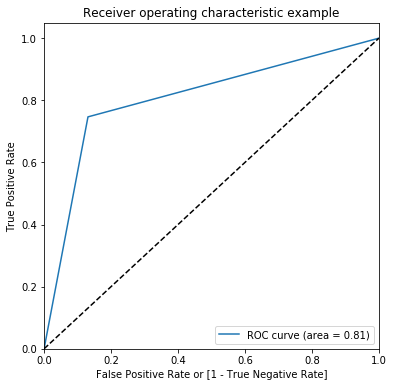

(array([0.        , 0.13113562, 1.        ]),
 array([0.        , 0.74666667, 1.        ]),
 array([2, 1, 0]))

In [168]:
draw_roc(y_test,pred_probs_test)

##### Note: Random Forest model evaluation summary

Training Accuracy: **85.66%** ,Training Recall: **84.36%** 

Test Accuracy: **85.86%**, Test recall: **74.66%**

Accuracy of Random Forest model is quite well but there is huge difference of recall in Training and Test set. As our target is to find out the maximum number of high risk HVC, we would give more importance on recall value.

## Final model Selection:

After doing Principal Component Analysis (PCA), we have build couple of Classification models with principal components to predict churn of HVC. Output of different models are as below:

   **i) Logistic Regression:**
    
   Training Accuracy: **84.04%** ,Training Recall: **85.08%** 

   Test Accuracy: **83.77%**, Test recall: **82.26%**

Logistic Regression algorithm is working very well. Here difference of Train and Test metrices are quite low.




  **ii) Decision Tree:**
  
   Training Accuracy: **86.56%** ,Training Recall: **87.38%** 

   Test Accuracy: **82.91%**, Test recall: **71.46%**

Accuracy of Decision Tree model is quite well but there is huge difference of recall in Training and Test set. 

  
  **iii) Random Forest:**
  
  Training Accuracy: **85.66%** ,Training Recall: **84.36%** 

  Test Accuracy: **85.86%**, Test recall: **74.66%**
  

Accuracy of Random Forest model is quite well but there is huge difference of recall in Training and Test set.

  **As our target is to find out the maximum number of high risk HVC accurately, we would give more importance on recall value. from that purspective we can see that Logistic Regression is performing better than other algorithms as both accuracy and  recall value in train and test set are very near. So we are selecting Logistic regression as our final model.**

### v) Build Classification model without using PCA & select best model

#### i) Logistic Regression with RFE

In [169]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [170]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_SMOTE, y_train_SMOTE)

In [171]:
col = X_train.columns[rfe.support_]
col

Index(['std_og_mou_8', 'og_others_7', 'og_others_8', 'total_og_mou_8',
       'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8', 'vol_2g_mb_6',
       'sep_vbc_3g', 'avg_voice_data_amt_6_7', 'Change_total_ic_mou',
       'Change_vol_2g_mb', 'Change_total_voice_data_recharge_amt',
       'Change_onnet_mou', 'Change_offnet_mou'],
      dtype='object')

In [172]:

X_train_SMOTE_copy = X_train_SMOTE.copy()

In [173]:
# Assessing the model with StatsModels

import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_SMOTE[col])
logm2 = sm.GLM(y_train_SMOTE,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38602
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14727.
Date:                Mon, 24 Feb 2020   Deviance:                       29454.
Time:                        18:35:37   Pearson chi2:                 2.54e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -9.2253      0.240    -38.374      0.000      -9.697      -8.754
std_og_mou_8                             7.9141      0.371     21.313      0.000       7.186       8.642
og_others_7                             -3.6857      0.111    -33.116      0.000      -3.904      -3.468
og_others_8                              4.6059      0.150     30.675      0.000       4.312       4.900
total_og_mou_8                          -9.9377      0.417    -23.825      0.000     -10.755      -9.120
total_ic_mou_6                          -3.4766      0.300    -11.591      0.000      -4.064      -2.889
total_ic_mou_8                          -2.9112      0.341     -8.533      0.000      -3.580      -2.243
spl_ic_mou_8                            -3.0408      0.179    -16.976      0.000      -3.392      -2.690
vol_2g_mb_6                             -2.8321      0.153    -18.522      0.000      -3.132      -2.532
sep_vbc_3g                              -6.7239      0.545    -12.347      0.000      -7.791      -5.657
avg_voice_data_amt_6_7                  -5.6213      0.246    -22.814      0.000      -6.104      -5.138
Change_total_ic_mou                      5.8852      0.340     17.295      0.000       5.218       6.552
Change_vol_2g_mb                         4.9838      0.239     20.887      0.000       4.516       5.451
Change_total_voice_data_recharge_amt     8.7191      0.346     25.223      0.000       8.042       9.397
Change_onnet_mou                         2.4572      0.121     20.354      0.000       2.221       2.694
Change_offnet_mou                        2.6553      0.125     21.276      0.000       2.411       2.900
========================================================================================================
"""

In [174]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

0        0.428087
1        0.089907
2        0.232533
3        0.000045
4        0.143110
           ...   
38613    0.638750
38614    0.431756
38615    0.973689
38616    0.905522
38617    0.978276
Length: 38618, dtype: float64

In [175]:
y_train_pred_final = pd.DataFrame({'Churn':y_train_SMOTE.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train_SMOTE.index
y_train_pred_final.head()

Churn  Churn_Prob  ID
0      0    0.428087   0
1      0    0.089907   1
2      0    0.232533   2
3      0    0.000045   3
4      0    0.143110   4

In [176]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)


In [177]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15984  3325]
 [ 2671 16638]]


In [178]:
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ("Precision : %.4g" % metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted))   

Accuracy : 0.8447
Recall/Sensitivity : 0.8617
Precision : 0.8334
AUC Score (Train): 0.844736


#### ii) Random Forest with feature importance 

In [181]:
# Create a based model

rf_1 = RandomForestClassifier()
model_fit_eva(rf_1,X_train_SMOTE,y_train_SMOTE)

Accuracy : 1
Recall/Sensitivity : 1
Precision : 1
AUC Score (Train): 1.000000


In [395]:
# Create the parameter grid based on the results of random search 

param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 300, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200], 
    'max_features': [12, 15, 20]
}

rf_2 = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf_2, 
                           param_grid = param_grid, 
                           n_jobs = 4,
                           verbose = 1)

In [396]:
# Fit the grid search to the data
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed: 19.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [397]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.999948213360953 using {'max_depth': 8, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 100}


#### Fitting the final model with the best parameters obtained from grid search

In [182]:
# model with the best hyperparameters

rf_3 = RandomForestClassifier(max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=400,
                             max_features=20,
                             n_estimators=100)

model_fit_eva(rf_3,X_train_SMOTE,y_train_SMOTE)

Accuracy : 0.905
Recall/Sensitivity : 0.8966
Precision : 0.9118
AUC Score (Train): 0.967419


### vi) Identify main features which will help to predict Customer churn

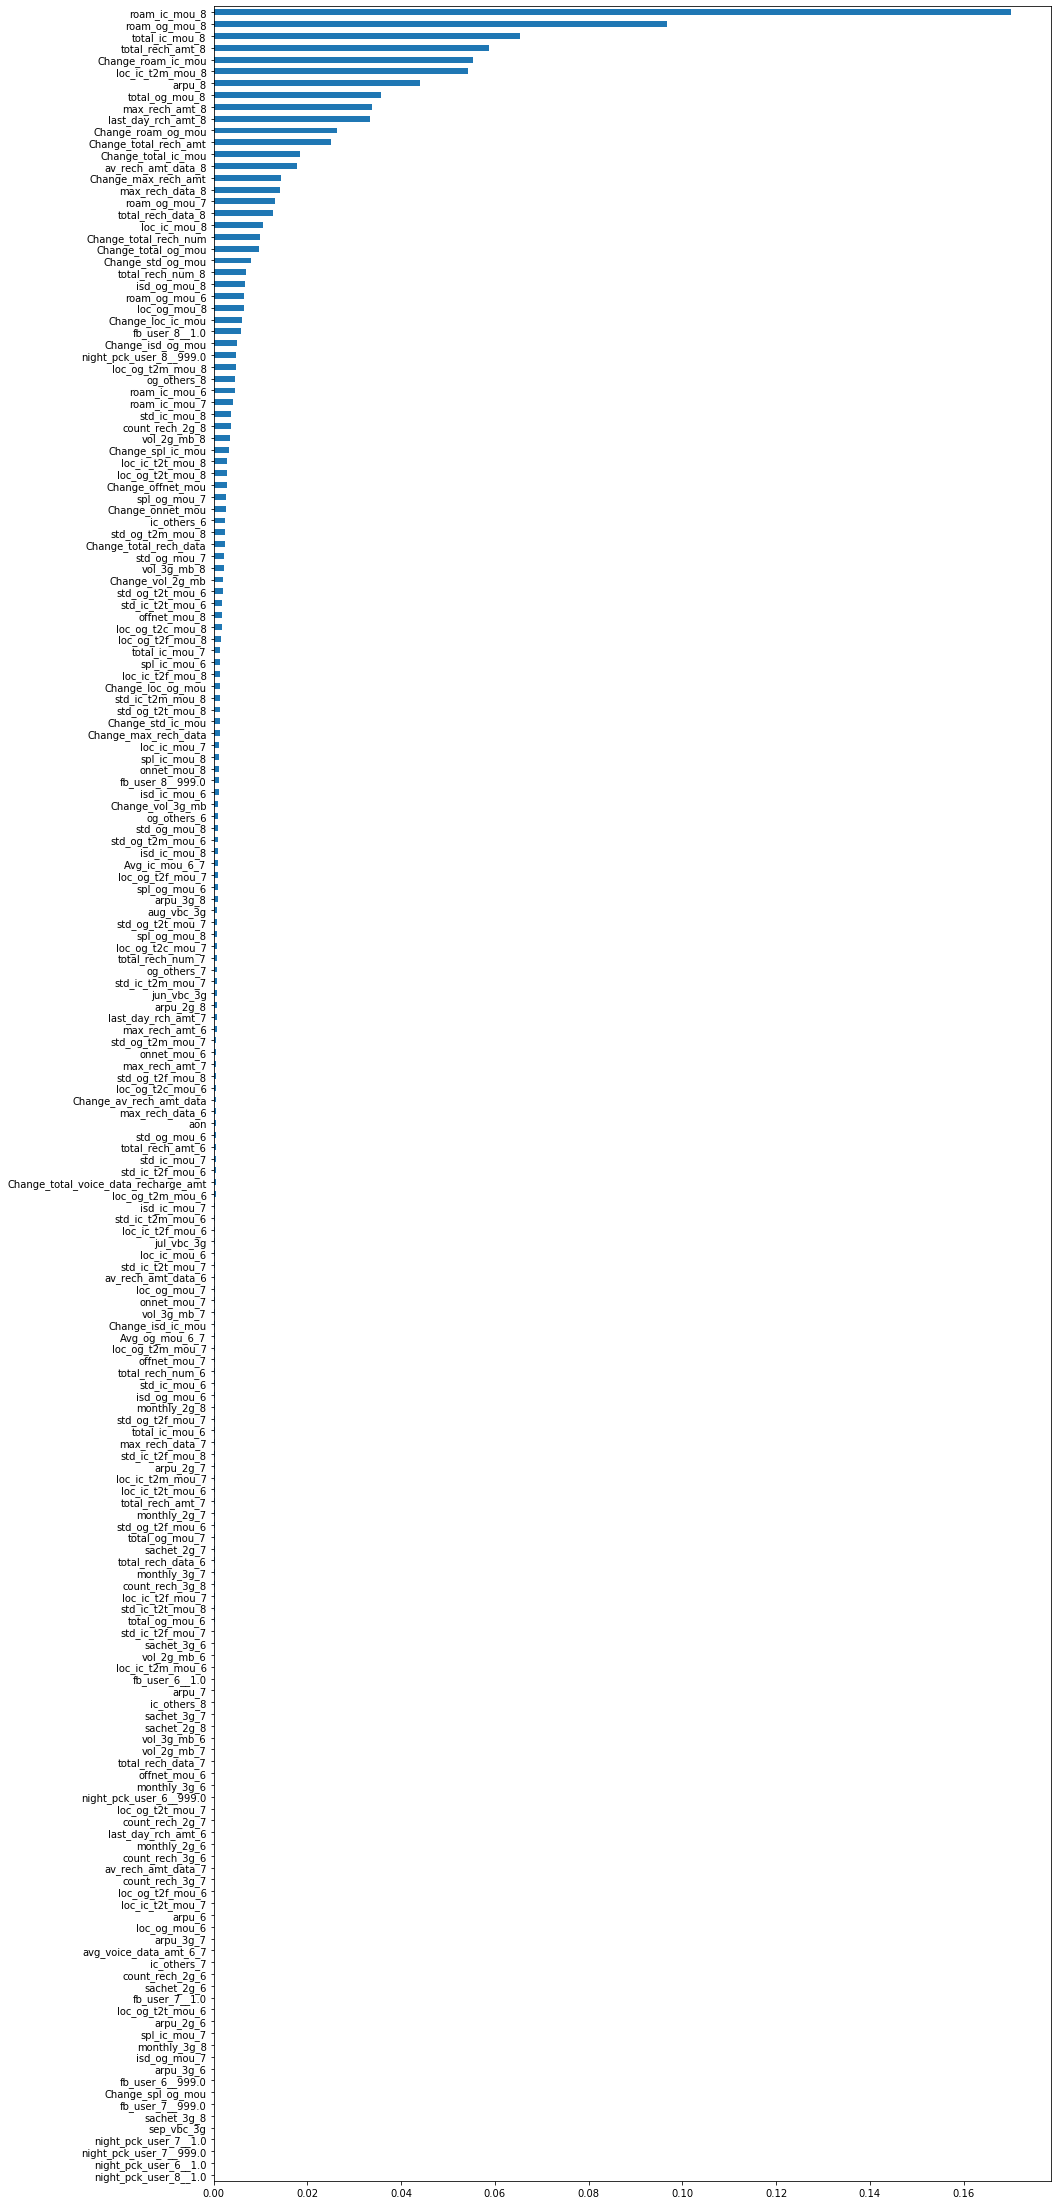

In [183]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf_3.feature_importances_, index=X_train_SMOTE.columns)
feat_importances.nlargest(len(X_train_SMOTE.columns)).sort_values().plot(kind='barh', align='center')

#### Note: 

Top 15 features as per the feature importance graph produced by Random Forest model are as below. Business should keep on eye for those features specially on action phase of customer.

1. **roam_ic_mou_8**  - Minutes of usage of roaming incoming  voice calls in Aug
2. **roam_og_mou_8**  - Minutes of usage of roaming outgoing  voice calls in Aug
3. **total_ic_mou_8**  - Minutes of uses of total incoming call in Aug
4. **total_rech_amt_8**  - Total amt of recharge in Aug
5. **Change_roam_ic_mou**  - Change of incoming roaming usage from good phase to Action phase (minutes)
6. **loc_ic_t2m_mou_8**  - Minutes of usage of local incoming  voice calls from other mobile network  in Aug
7. **arpu_8**  - Average revenue per user in Aug
8. **total_og_mou_8**  - Minutes of usage of total outgoing  voice calls in Aug
9. **max_rech_amt_8**  - Max recharge amt in Aug
10. **last_day_rch_amt_8**  - Last day recharge amount in Aug
11. **Change_roam_og_mou**  - Change of outgoing roaming from good phase to Action phase  (minutes)
12. **Change_total_rech_amt**  - Change of total recharge amount from good phase to Action phase
13. **Change_total_ic_mou**  - Change of total incoming usage from good phase to Action phase (minutes)
14. **av_rech_amt_data_8**  - Average Recharge Amt in Aug
15. **Change_max_rech_amt**  - Change of max recharge amount from good phase to Action phase


### vii) Recommend strategies to manage customer churn


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one.
For many incumbent operators, retaining high profitable customers is the number one business goal.

i) To retain the High Value Customers, Telecom provider should monitor the above metrices very care fully. From the EDA of total incoming and outgoing usage, we have noticed that behaviour of non-churn customers are almost remain same during good phase as well as action phase. But for churn customers total incoming and outgoing usage drop drastically from good phase to action phase.

ii) Business should keep an eye of the changes of total voice call recharge amount, average recharge amount for data etc. During EDA, we have seen that those variables are dropping drastically for the churn customers during action phase.

iii) Telecom providers have to improve their services- specially for outgoing calls, data services etc. 